In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 파일이 담긴 폴더 경로
folder_path = "/content/drive/MyDrive/OX/Dataset"

# 파일 리스트 가져오기
file_names = os.listdir(folder_path)

# 이미지 파일 리스트
image_files = [file for file in file_names if file.lower().endswith('.jpg') or file.lower().endswith('.png')]

# 라벨 추출
labels = []

for file_name in image_files:
    if 'o' in file_name.lower():
        labels.append(1)
    elif 'x' in file_name.lower():
        labels.append(0)

# 이미지 데이터를 numpy 배열로 변환
image_data = []

for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path).convert("L")  # 그레이스케일로 변환
    image = image.resize((300, 300))  # 이미지 크기를 300x300으로 조정
    image_array = np.array(image)  # 이미지를 numpy 배열로 변환
    image_data.append(image_array)

image_data = np.array(image_data)


labels = np.array(labels)

labels = to_categorical(labels, num_classes=2)

from sklearn.model_selection import train_test_split

x = image_data
y = labels

In [2]:
# mish swish activation
import keras.backend as K
from keras.layers import Activation

def mish(x):
    return x * K.tanh(K.softplus(x))

def swish(x):
    return x * K.sigmoid(x)

mish_activation = Activation(mish)
swish_activation = Activation(swish)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error, accuracy_score

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Leave-One-Out Cross-Validation
fold_rmse = []
fold_acc = []
for i in range(len(x_train)):
    x_train = np.concatenate([x[:i], x[i+1:]], axis=0)
    x_test = x[i:i+1]
    y_train = np.concatenate([y[:i], y[i+1:]], axis=0)
    y_test = y[i:i+1]

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위한 출력 레이어

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(x_train, y_train, epochs=2, batch_size=5, validation_split=0.2, verbose=2)

    predictions = model.predict(x_test)
    # 클래스로 변환
    predictions_classes = np.round(predictions).astype(int)
    acc = accuracy_score(y_test, predictions_classes)
    fold_acc.append(acc)

    print(f'Fold {i} Accuracy: {acc}\n')

print(f'Average Accuracy across folds: {np.mean(fold_acc)}')

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 데이터 분할
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위한 출력 레이어

    # 모델 컴파일
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=4, batch_size=5, validation_split=0.2, verbose=2)

        # 모델 평가 후 분류 결과 출력
    predictions = model.predict(x_test)
    predictions_classes = np.round(predictions).astype(int)
    acc = accuracy_score(y_test, predictions_classes)

    for i, (pred_class, actual_class) in enumerate(zip(predictions_classes, y_test)):
        print(f'Fold {fold} Sample {i+1} - Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')

# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')


Epoch 1/4


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 데이터 분할
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=5, batch_size=5, validation_split=0.2, verbose=2)

        # 모델 평가 후 분류 결과 출력
    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    for i, (pred_class, actual_class) in enumerate(zip(predictions_classes, y_test_classes)):
        print(f'Fold {fold} Sample {i+1} - Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)
# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')


Epoch 1/5
9/9 - 3s - loss: 25015.2090 - accuracy: 0.5714 - val_loss: 1919.0973 - val_accuracy: 0.4545 - 3s/epoch - 286ms/step
Epoch 2/5
9/9 - 0s - loss: 237.4520 - accuracy: 0.5238 - val_loss: 0.6657 - val_accuracy: 0.5455 - 199ms/epoch - 22ms/step
Epoch 3/5
9/9 - 0s - loss: 0.6934 - accuracy: 0.4286 - val_loss: 0.6568 - val_accuracy: 0.6364 - 197ms/epoch - 22ms/step
Epoch 4/5
9/9 - 0s - loss: 0.6932 - accuracy: 0.5238 - val_loss: 0.6349 - val_accuracy: 0.5455 - 198ms/epoch - 22ms/step
Epoch 5/5
9/9 - 0s - loss: 0.6931 - accuracy: 0.5476 - val_loss: 0.6272 - val_accuracy: 0.5455 - 198ms/epoch - 22ms/step
1/1 [==============================] - 0s 306ms/step
Fold 1 Sample 1 - Predicted Class: 1, Actual Class: 0
Fold 1 Sample 2 - Predicted Class: 1, Actual Class: 0
Fold 1 Sample 3 - Predicted Class: 1, Actual Class: 1
Fold 1 Sample 4 - Predicted Class: 1, Actual Class: 0
Fold 1 Sample 5 - Predicted Class: 1, Actual Class: 0
Fold 1 Sample 6 - Predicted Class: 1, Actual Class: 0
Fold 1 Samp

In [ ]:
!pip install tensorflow tensorflow-addons


In [ ]:
!pip install --upgrade tensorflow tensorflow-addons


In [ ]:
import tensorflow_addons as tfa

# 데이터 분할
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='tfa.activations.mish', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='tfa.activations.mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='tfa.activations.mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=20, batch_size=5, validation_split=0.2, verbose=2)

    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    for i, (pred_class, actual_class) in enumerate(zip(predictions_classes, y_test_classes)):
        print(f'Fold {fold} Sample {i+1} - Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')

ModuleNotFoundError: No module named 'tensorflow_addons'

In [ ]:
# 데이터 분할
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='mish', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    # model.add(Conv2D(256, (3, 3), activation='mish'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='mish'))
    model.add(Dense(256, activation='mish'))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=15, batch_size=10, validation_split=0.2, verbose=2)

    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    for i, (pred_class, actual_class) in enumerate(zip(predictions_classes, y_test_classes)):
        print(f'Fold {fold} Sample {i+1} - Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')

Epoch 1/15
6/6 - 2s - loss: 272.8976 - accuracy: 0.5263 - val_loss: 18.7068 - val_accuracy: 0.5333 - 2s/epoch - 406ms/step
Epoch 2/15
6/6 - 0s - loss: 13.2369 - accuracy: 0.5614 - val_loss: 1.4989 - val_accuracy: 0.7333 - 344ms/epoch - 57ms/step
Epoch 3/15
6/6 - 0s - loss: 3.1216 - accuracy: 0.8070 - val_loss: 11.1232 - val_accuracy: 0.6667 - 345ms/epoch - 58ms/step
Epoch 4/15
6/6 - 0s - loss: 4.8038 - accuracy: 0.8070 - val_loss: 18.6238 - val_accuracy: 0.6667 - 308ms/epoch - 51ms/step
Epoch 5/15
6/6 - 0s - loss: 2.6525 - accuracy: 0.8947 - val_loss: 13.7112 - val_accuracy: 0.6000 - 344ms/epoch - 57ms/step
Epoch 6/15
6/6 - 0s - loss: 0.0386 - accuracy: 0.9825 - val_loss: 15.6124 - val_accuracy: 0.6000 - 310ms/epoch - 52ms/step
Epoch 7/15
6/6 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 23.9503 - val_accuracy: 0.6000 - 311ms/epoch - 52ms/step
Epoch 8/15
6/6 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 25.8841 - val_accuracy: 0.6000 - 311ms/epoch - 52ms/step
Epoch 9/15
6

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 파일이 담긴 폴더 경로
folder_path = "/content/drive/MyDrive/OX/Dataset"

# 파일 리스트 가져오기
file_names = os.listdir(folder_path)

# 이미지 파일 리스트
image_files = [file for file in file_names if file.lower().endswith('.jpg') or file.lower().endswith('.png')]

# 라벨 추출
labels = []

for file_name in image_files:
    if 'o' in file_name.lower():
        labels.append(1)
    elif 'x' in file_name.lower():
        labels.append(0)

# 이미지 데이터를 numpy 배열로 변환
image_data = []

for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path).convert("L")  # 그레이스케일로 변환
    image = image.resize((300, 300))  # 이미지 크기를 300x300으로 조정
    image_array = np.array(image) / 255.0  # 이미지를 numpy 배열로 변환
    image_data.append(image_array)

image_data = np.array(image_data)

# 라벨을 numpy 배열로 변환
labels = np.array(labels)
labels = to_categorical(labels, num_classes=2)

x = image_data
y = labels

# 데이터 분할
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_file_names = [image_files[i] for i in test_index]  # 테스트 셋의 파일 이름 추출

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(32, (4, 4), activation='mish', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(64, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation=mish))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=20, batch_size=5, validation_split=0.2, verbose=2)

    # 모델 평가
    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    # 분류 결과 출력
    for file_name, pred_class, actual_class in zip(test_file_names, predictions_classes, y_test_classes):
        print(f'Fold {fold} - File: {file_name}, Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')


Epoch 1/20
12/12 - 17s - loss: 1.1572 - accuracy: 0.5614 - val_loss: 0.7754 - val_accuracy: 0.5333 - 17s/epoch - 1s/step
Epoch 2/20
12/12 - 14s - loss: 0.7410 - accuracy: 0.5263 - val_loss: 0.5994 - val_accuracy: 0.6000 - 14s/epoch - 1s/step
Epoch 3/20
12/12 - 16s - loss: 0.4726 - accuracy: 0.8421 - val_loss: 0.6401 - val_accuracy: 0.6667 - 16s/epoch - 1s/step
Epoch 4/20
12/12 - 13s - loss: 0.4213 - accuracy: 0.8070 - val_loss: 0.6482 - val_accuracy: 0.6667 - 13s/epoch - 1s/step
Epoch 5/20
12/12 - 12s - loss: 0.2896 - accuracy: 0.8246 - val_loss: 0.7443 - val_accuracy: 0.6667 - 12s/epoch - 1s/step
Epoch 6/20
12/12 - 14s - loss: 0.1963 - accuracy: 0.9474 - val_loss: 1.1519 - val_accuracy: 0.6000 - 14s/epoch - 1s/step
Epoch 7/20
12/12 - 14s - loss: 0.2025 - accuracy: 0.8947 - val_loss: 0.6419 - val_accuracy: 0.6000 - 14s/epoch - 1s/step
Epoch 8/20
12/12 - 14s - loss: 0.1441 - accuracy: 0.9474 - val_loss: 0.7761 - val_accuracy: 0.6667 - 14s/epoch - 1s/step
Epoch 9/20
12/12 - 14s - loss: 0

### Loocv

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

# Leave-One-Out Cross Validation
loo = LeaveOneOut()
fold_acc = []

for fold, (train_index, test_index) in enumerate(loo.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 테스트 셋의 파일 이름 추출
    test_file_name = image_files[test_index[0]]


    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(32, (4, 4), activation='mish', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(64, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='mish'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=mish))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=15, batch_size=10, validation_split=0.2, verbose=2)

    predictions = model.predict(x_test)
    pred_class = np.argmax(predictions)
    actual_class = np.argmax(y_test)
    acc = (pred_class == actual_class)

    # 분류 결과 출력
    print(f'Fold {fold} - File: {test_file_name}, Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

# 모든 폴드의 평균 정확도 출력
accuracy = np.mean(fold_acc)
print(f'Average Accuracy across folds: {accuracy}')


Epoch 1/15
7/7 - 4s - loss: 26.4484 - accuracy: 0.4762 - val_loss: 2.7546 - val_accuracy: 0.4375 - 4s/epoch - 568ms/step
Epoch 2/15
7/7 - 0s - loss: 3.5783 - accuracy: 0.5238 - val_loss: 8.6191 - val_accuracy: 0.5625 - 249ms/epoch - 36ms/step
Epoch 3/15
7/7 - 0s - loss: 1.7180 - accuracy: 0.6349 - val_loss: 0.6984 - val_accuracy: 0.6250 - 246ms/epoch - 35ms/step
Epoch 4/15
7/7 - 0s - loss: 0.8185 - accuracy: 0.7143 - val_loss: 0.9463 - val_accuracy: 0.6250 - 246ms/epoch - 35ms/step
Epoch 5/15
7/7 - 0s - loss: 0.3373 - accuracy: 0.8889 - val_loss: 2.8531 - val_accuracy: 0.4375 - 247ms/epoch - 35ms/step
Epoch 6/15
7/7 - 0s - loss: 0.8757 - accuracy: 0.7619 - val_loss: 0.9329 - val_accuracy: 0.6875 - 248ms/epoch - 35ms/step
Epoch 7/15
7/7 - 0s - loss: 0.2836 - accuracy: 0.8413 - val_loss: 1.0626 - val_accuracy: 0.6250 - 249ms/epoch - 36ms/step
Epoch 8/15
7/7 - 0s - loss: 0.2109 - accuracy: 0.9048 - val_loss: 1.1637 - val_accuracy: 0.6250 - 249ms/epoch - 36ms/step
Epoch 9/15
7/7 - 0s - los

1/1 [==============================] - 0s 97ms/step
Fold 5 - File: x_18.png, Predicted Class: 0, Actual Class: 0
Fold 5 Accuracy: True
Epoch 1/15
7/7 - 2s - loss: 21.3179 - accuracy: 0.4762 - val_loss: 2.8260 - val_accuracy: 0.4375 - 2s/epoch - 356ms/step
Epoch 2/15
7/7 - 0s - loss: 1.4084 - accuracy: 0.5714 - val_loss: 0.6486 - val_accuracy: 0.6875 - 254ms/epoch - 36ms/step
Epoch 3/15
7/7 - 0s - loss: 1.0332 - accuracy: 0.5079 - val_loss: 1.6176 - val_accuracy: 0.4375 - 253ms/epoch - 36ms/step
Epoch 4/15
7/7 - 0s - loss: 0.5515 - accuracy: 0.7937 - val_loss: 1.1527 - val_accuracy: 0.6875 - 290ms/epoch - 41ms/step
Epoch 5/15
7/7 - 0s - loss: 0.5758 - accuracy: 0.8413 - val_loss: 0.3959 - val_accuracy: 0.8125 - 274ms/epoch - 39ms/step
Epoch 6/15
7/7 - 0s - loss: 0.2982 - accuracy: 0.9048 - val_loss: 1.2561 - val_accuracy: 0.6250 - 302ms/epoch - 43ms/step
Epoch 7/15
7/7 - 0s - loss: 0.2845 - accuracy: 0.8889 - val_loss: 1.1758 - val_accuracy: 0.6875 - 289ms/epoch - 41ms/step
Epoch 8/15
7

1/1 [==============================] - 0s 154ms/step
Fold 6 - File: x_17.png, Predicted Class: 0, Actual Class: 0
Fold 6 Accuracy: True
Epoch 1/15
7/7 - 2s - loss: 29.1520 - accuracy: 0.4444 - val_loss: 7.0587 - val_accuracy: 0.4375 - 2s/epoch - 354ms/step
Epoch 2/15
7/7 - 0s - loss: 6.8539 - accuracy: 0.4762 - val_loss: 4.1147 - val_accuracy: 0.4375 - 274ms/epoch - 39ms/step
Epoch 3/15
7/7 - 0s - loss: 1.0891 - accuracy: 0.6032 - val_loss: 0.8654 - val_accuracy: 0.4375 - 245ms/epoch - 35ms/step
Epoch 4/15
7/7 - 0s - loss: 0.5244 - accuracy: 0.7460 - val_loss: 0.6753 - val_accuracy: 0.7500 - 285ms/epoch - 41ms/step
Epoch 5/15
7/7 - 0s - loss: 0.4441 - accuracy: 0.7937 - val_loss: 0.9616 - val_accuracy: 0.7500 - 249ms/epoch - 36ms/step
Epoch 6/15
7/7 - 0s - loss: 0.3936 - accuracy: 0.8254 - val_loss: 1.0705 - val_accuracy: 0.6250 - 248ms/epoch - 35ms/step
Epoch 7/15
7/7 - 0s - loss: 0.3769 - accuracy: 0.8571 - val_loss: 1.5369 - val_accuracy: 0.4375 - 247ms/epoch - 35ms/step
Epoch 8/15


NameError: name 'fold_acc' is not defined

## CNN 2주차   
패딩추가    
에폭 20이상   
셔플 없이   
시각화   
loss val_loss 로 인한판단    
.h5로 가중치 보는 방법   
cnn_lstm (mdd모델) 구현 , lstm에 노드 수 20정도로   
cnn _ cam라이브러리 -> cam에 대한 조사    



패딩추가 - same   
에폭 20이상   
셔플 없이 - shuffle=False   
시각화

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 파일이 담긴 폴더 경로
folder_path = "/content/drive/MyDrive/OX/Dataset"

# 파일 리스트 가져오기
file_names = os.listdir(folder_path)

# 이미지 파일 리스트
image_files = [file for file in file_names if file.lower().endswith('.jpg') or file.lower().endswith('.png')]

# 라벨 추출
labels = []

for file_name in image_files:
    if 'o' in file_name.lower():
        labels.append(1)
    elif 'x' in file_name.lower():
        labels.append(0)

# 이미지 데이터를 numpy 배열로 변환
image_data = []

for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path).convert("L")  # 그레이스케일로 변환
    image = image.resize((300, 300))  # 이미지 크기를 300x300으로 조정
    image_array = np.array(image) / 255.0  # 이미지를 numpy 배열로 변환
    image_data.append(image_array)

image_data = np.array(image_data)

# 라벨을 numpy 배열로 변환
labels = np.array(labels)
labels = to_categorical(labels, num_classes=2)

x = image_data
y = labels


models = []

# 데이터 분할
kf = KFold(n_splits=10, shuffle=False)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_file_names = [image_files[i] for i in test_index]  # 테스트 셋의 파일 이름 추출

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(16, (4, 4), activation='mish', padding='same', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(32, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(64, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(128, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(256, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    # model.add(Conv2D(512, (4, 4), activation='mish', padding='same'))
    # model.add(MaxPooling2D((3, 3)))
    # model.add(Conv2D(1024, (3, 3), activation='mish', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation=mish))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=20, batch_size=8, validation_split=0.2, verbose=2)

    # 모델 평가
    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    models.append((model, acc))

    # 분류 결과 출력
    for file_name, pred_class, actual_class in zip(test_file_names, predictions_classes, y_test_classes):
        print(f'Fold {fold} - File: {file_name}, Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')


Epoch 1/20
8/8 - 4s - loss: 0.7233 - accuracy: 0.5439 - val_loss: 0.7703 - val_accuracy: 0.4000 - 4s/epoch - 469ms/step
Epoch 2/20
8/8 - 0s - loss: 0.6781 - accuracy: 0.5789 - val_loss: 0.7239 - val_accuracy: 0.4000 - 181ms/epoch - 23ms/step
Epoch 3/20
8/8 - 0s - loss: 0.6725 - accuracy: 0.5789 - val_loss: 0.7363 - val_accuracy: 0.4000 - 168ms/epoch - 21ms/step
Epoch 4/20
8/8 - 0s - loss: 0.6812 - accuracy: 0.5789 - val_loss: 0.6980 - val_accuracy: 0.4000 - 152ms/epoch - 19ms/step
Epoch 5/20
8/8 - 0s - loss: 0.6194 - accuracy: 0.7544 - val_loss: 0.5910 - val_accuracy: 0.7333 - 156ms/epoch - 20ms/step
Epoch 6/20
8/8 - 0s - loss: 0.4530 - accuracy: 0.8070 - val_loss: 1.2022 - val_accuracy: 0.4000 - 151ms/epoch - 19ms/step
Epoch 7/20
8/8 - 0s - loss: 0.2976 - accuracy: 0.8421 - val_loss: 0.2965 - val_accuracy: 0.8000 - 158ms/epoch - 20ms/step
Epoch 8/20
8/8 - 0s - loss: 0.2224 - accuracy: 0.8947 - val_loss: 0.3061 - val_accuracy: 0.8667 - 151ms/epoch - 19ms/step
Epoch 9/20
8/8 - 0s - loss

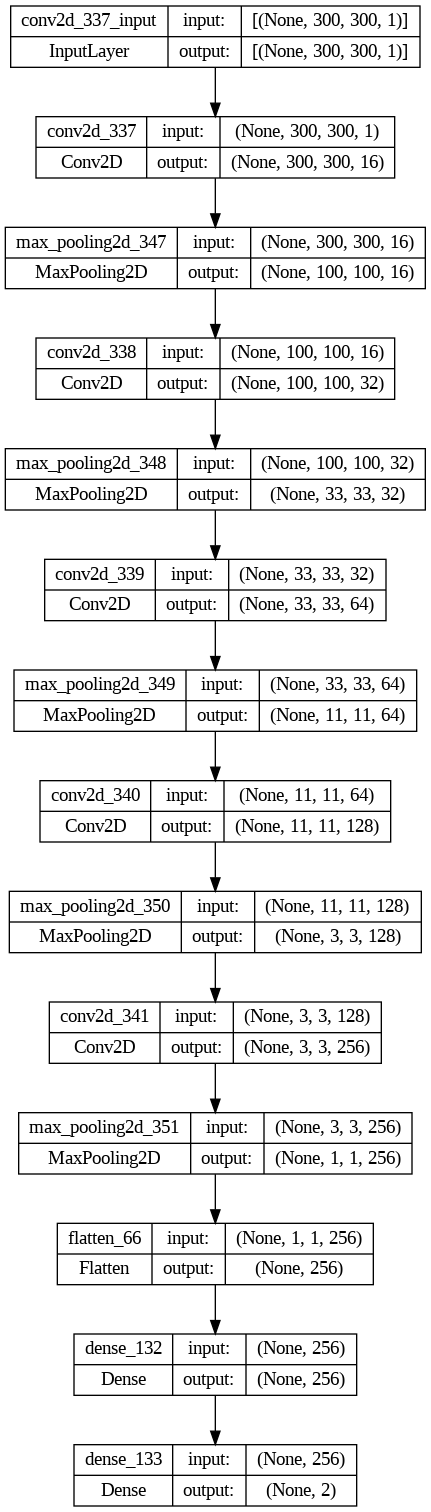

In [ ]:
from tensorflow.keras.utils import plot_model

best_model_index = np.argmax([acc for _, acc in models])
best_model = models[best_model_index][0]

plot_model(best_model, to_file='best_model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save('ssssihoon.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model_network = load_model('/content/ssssihoon.h5')


In [ ]:
model_network

In [ ]:
# 모델의 구조 확인
model_network.summary()

# 모든 층의 가중치를 가져오기
weights = model_network.get_weights()

# 각 층의 가중치 형태와 값을 출력
for i, layer in enumerate(model_network.layers):
    print(f"Layer {i+1} - {layer.name}")
    if layer.trainable:
        layer_weights = weights[i*2]  # 각 층의 가중치
        layer_bias = weights[i*2+1]    # 각 층의 편향
        print(f"Weights shape: {layer_weights.shape}")
        print(f"Weights values: {layer_weights}")
        print(f"Bias shape: {layer_bias.shape}")
        print(f"Bias values: {layer_bias}")
    else:
        print("This layer is not trainable (e.g., pooling layer)")
    print()


Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_382 (Conv2D)         (None, 300, 300, 16)      272       
                                                                 
 max_pooling2d_392 (MaxPool  (None, 100, 100, 16)      0         
 ing2D)                                                          
                                                                 
 conv2d_383 (Conv2D)         (None, 100, 100, 32)      8224      
                                                                 
 max_pooling2d_393 (MaxPool  (None, 33, 33, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_384 (Conv2D)         (None, 33, 33, 64)        32832     
                                                                 
 max_pooling2d_394 (MaxPool  (None, 11, 11, 64)      

IndexError: list index out of range

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 파일이 담긴 폴더 경로
folder_path = "/content/drive/MyDrive/OX/Dataset"

# 파일 리스트 가져오기
file_names = os.listdir(folder_path)

# 이미지 파일 리스트
image_files = [file for file in file_names if file.lower().endswith('.jpg') or file.lower().endswith('.png')]

# 라벨 추출
labels = []

for file_name in image_files:
    if 'o' in file_name.lower():
        labels.append(1)
    elif 'x' in file_name.lower():
        labels.append(0)

# 이미지 데이터를 numpy 배열로 변환
image_data = []

for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path).convert("L")  # 그레이스케일로 변환
    image = image.resize((300, 300))  # 이미지 크기를 300x300으로 조정
    image_array = np.array(image) / 255.0  # 이미지를 numpy 배열로 변환
    image_data.append(image_array)

image_data = np.array(image_data)

# 라벨을 numpy 배열로 변환
labels = np.array(labels)
labels = to_categorical(labels, num_classes=2)

x = image_data
y = labels


models = []

# 데이터 분할
kf = KFold(n_splits=10, shuffle=False)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_file_names = [image_files[i] for i in test_index]  # 테스트 셋의 파일 이름 추출

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(16, (4, 4), activation='mish', padding='same', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(32, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(64, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(128, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(256, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    # model.add(Conv2D(512, (4, 4), activation='mish', padding='same'))
    # model.add(MaxPooling2D((3, 3)))
    # model.add(Conv2D(1024, (3, 3), activation='mish', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation=mish))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

    # 모델 평가
    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    models.append((model, acc))

    # 분류 결과 출력
    for file_name, pred_class, actual_class in zip(test_file_names, predictions_classes, y_test_classes):
        print(f'Fold {fold} - File: {file_name}, Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')


Epoch 1/20
72/72 - 8s - loss: 0.7227 - accuracy: 0.5417 - 8s/epoch - 112ms/step
Epoch 2/20
72/72 - 0s - loss: 0.4683 - accuracy: 0.8194 - 471ms/epoch - 7ms/step
Epoch 3/20
72/72 - 0s - loss: 0.3732 - accuracy: 0.8333 - 453ms/epoch - 6ms/step
Epoch 4/20
72/72 - 0s - loss: 0.2847 - accuracy: 0.8889 - 467ms/epoch - 6ms/step
Epoch 5/20
72/72 - 1s - loss: 0.5959 - accuracy: 0.7917 - 513ms/epoch - 7ms/step
Epoch 6/20
72/72 - 1s - loss: 0.2713 - accuracy: 0.9306 - 816ms/epoch - 11ms/step
Epoch 7/20
72/72 - 1s - loss: 0.1422 - accuracy: 0.9306 - 933ms/epoch - 13ms/step
Epoch 8/20
72/72 - 1s - loss: 0.0828 - accuracy: 0.9583 - 833ms/epoch - 12ms/step
Epoch 9/20
72/72 - 1s - loss: 0.0458 - accuracy: 0.9722 - 944ms/epoch - 13ms/step
Epoch 10/20
72/72 - 1s - loss: 0.1149 - accuracy: 0.9722 - 845ms/epoch - 12ms/step
Epoch 11/20
72/72 - 1s - loss: 0.1273 - accuracy: 0.9722 - 764ms/epoch - 11ms/step
Epoch 12/20
72/72 - 1s - loss: 0.0343 - accuracy: 0.9861 - 841ms/epoch - 12ms/step
Epoch 13/20
72/72 -

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 파일이 담긴 폴더 경로
folder_path = "/content/drive/MyDrive/OX/Dataset"

# 파일 리스트 가져오기
file_names = os.listdir(folder_path)

# 이미지 파일 리스트
image_files = [file for file in file_names if file.lower().endswith('.jpg') or file.lower().endswith('.png')]

# 라벨 추출
labels = []

for file_name in image_files:
    if 'o' in file_name.lower():
        labels.append(1)
    elif 'x' in file_name.lower():
        labels.append(0)

# 이미지 데이터를 numpy 배열로 변환
image_data = []

for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path).convert("L")  # 그레이스케일로 변환
    image = image.resize((300, 300))  # 이미지 크기를 300x300으로 조정
    image_array = np.array(image) / 255.0  # 이미지를 numpy 배열로 변환
    image_data.append(image_array)

image_data = np.array(image_data)

# 라벨을 numpy 배열로 변환
labels = np.array(labels)
labels = to_categorical(labels, num_classes=2)

x = image_data
y = labels


models = []

# 데이터 분할
kf = KFold(n_splits=80, shuffle=False)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_file_names = [image_files[i] for i in test_index]  # 테스트 셋의 파일 이름 추출

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(16, (4, 4), activation='mish', padding='same', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(32, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(64, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(128, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(256, (4, 4), activation='mish', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    # model.add(Conv2D(512, (4, 4), activation='mish', padding='same'))
    # model.add(MaxPooling2D((3, 3)))
    # model.add(Conv2D(1024, (3, 3), activation='mish', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation=mish))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

    # 모델 평가
    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    models.append((model, acc))

    # 분류 결과 출력
    for file_name, pred_class, actual_class in zip(test_file_names, predictions_classes, y_test_classes):
        print(f'Fold {fold} - File: {file_name}, Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

# 모든 폴드의 평균 정확도 출력
print(f'Average Accuracy across folds: {np.mean(fold_acc)}')


Epoch 1/20
79/79 - 5s - loss: 0.7119 - accuracy: 0.5443 - 5s/epoch - 59ms/step
Epoch 2/20
79/79 - 0s - loss: 0.5294 - accuracy: 0.7089 - 361ms/epoch - 5ms/step
Epoch 3/20
79/79 - 0s - loss: 0.3889 - accuracy: 0.8608 - 352ms/epoch - 4ms/step
Epoch 4/20
79/79 - 0s - loss: 0.1913 - accuracy: 0.8987 - 350ms/epoch - 4ms/step
Epoch 5/20
79/79 - 0s - loss: 0.2006 - accuracy: 0.9367 - 352ms/epoch - 4ms/step
Epoch 6/20
79/79 - 0s - loss: 0.4047 - accuracy: 0.8987 - 352ms/epoch - 4ms/step
Epoch 7/20
79/79 - 0s - loss: 0.1826 - accuracy: 0.8987 - 354ms/epoch - 4ms/step
Epoch 8/20
79/79 - 0s - loss: 0.0709 - accuracy: 0.9747 - 353ms/epoch - 4ms/step
Epoch 9/20
79/79 - 0s - loss: 0.0873 - accuracy: 0.9494 - 353ms/epoch - 4ms/step
Epoch 10/20
79/79 - 0s - loss: 0.0418 - accuracy: 0.9873 - 351ms/epoch - 4ms/step
Epoch 11/20
79/79 - 0s - loss: 0.0278 - accuracy: 0.9873 - 350ms/epoch - 4ms/step
Epoch 12/20
79/79 - 0s - loss: 0.0136 - accuracy: 1.0000 - 343ms/epoch - 4ms/step
Epoch 13/20
79/79 - 0s - lo

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ModelCheckpoint


# 파일이 담긴 폴더 경로
folder_path = "/content/drive/MyDrive/OX/Dataset"

# 파일 리스트 가져오기
file_names = os.listdir(folder_path)

# 이미지 파일 리스트
image_files = [file for file in file_names if file.lower().endswith('.jpg') or file.lower().endswith('.png')]

# 라벨 추출
labels = []

for file_name in image_files:
    if 'o' in file_name.lower():
        labels.append(1)
    elif 'x' in file_name.lower():
        labels.append(0)

# 이미지 데이터를 numpy 배열로 변환
image_data = []

for file_name in image_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path).convert("L")  # 그레이스케일로 변환
    image = image.resize((300, 300))  # 이미지 크기를 300x300으로 조정
    image_array = np.array(image) / 255.0  # 이미지를 numpy 배열로 변환
    image_data.append(image_array)

image_data = np.array(image_data)
image_data = np.expand_dims(image_data, axis=-1)  # (samples, 300, 300, 1) 형태로 변환

# 라벨을 numpy 배열로 변환
labels = np.array(labels)
labels = to_categorical(labels, num_classes=2)

x = image_data
y = labels

models = []

# 데이터 분할
kf = KFold(n_splits=80, shuffle=False)
fold_acc = []

# K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):

    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_file_names = [image_files[i] for i in test_index]  # 테스트 셋의 파일 이름 추출

    # CNN 모델 생성
    model = Sequential()
    model.add(Conv2D(16, (4, 4), activation='relu', padding='same', input_shape=(300, 300, 1)))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(32, (4, 4), activation='relu', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(64, (4, 4), activation='relu', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Conv2D(256, (4, 4), activation='relu', padding='same'))
    model.add(MaxPooling2D((3, 3)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', name='hidden_case'))
    model.add(Dense(2, activation='softmax'))

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    checkpoint_path = f"fold_{fold}_OX_Classification.h5"

    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')

    # 모델 훈련
    model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2, callbacks=[checkpoint], validation_split=0.2)

    # 모델 평가
    predictions = model.predict(x_test)
    predictions_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_classes, predictions_classes)

    models.append((model, acc))
    i += 1

    # 분류 결과 출력
    for file_name, pred_class, actual_class in zip(test_file_names, predictions_classes, y_test_classes):
        print(f'Fold {fold} - File: {file_name}, Predicted Class: {pred_class}, Actual Class: {actual_class}')
    print(f'Fold {fold} Accuracy: {acc}')
    fold_acc.append(acc)

print(f'Average Accuracy across folds: {np.mean(fold_acc)}')

Epoch 1/10
63/63 - 2s - loss: 0.8592 - accuracy: 0.4444 - val_loss: 0.6954 - val_accuracy: 0.4375 - 2s/epoch - 39ms/step
Epoch 2/10
63/63 - 0s - loss: 0.6937 - accuracy: 0.5238 - val_loss: 0.6990 - val_accuracy: 0.4375 - 319ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6937 - accuracy: 0.5238 - val_loss: 0.6995 - val_accuracy: 0.4375 - 326ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6970 - accuracy: 0.5238 - val_loss: 0.6937 - val_accuracy: 0.4375 - 380ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.6766 - accuracy: 0.6190 - val_loss: 0.6741 - val_accuracy: 0.4375 - 362ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.5124 - accuracy: 0.7460 - val_loss: 0.8018 - val_accuracy: 0.4375 - 336ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.3374 - accuracy: 0.8254 - val_loss: 0.3903 - val_accuracy: 0.7500 - 347ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.2450 - accuracy: 0.9365 - val_loss: 0.3427 - val_accuracy: 0.7500 - 392ms/epoch - 6ms/step
Epoch 9/10
63/63 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4757 - accuracy: 0.7302 - val_loss: 0.7641 - val_accuracy: 0.5625 - 332ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2791 - accuracy: 0.8730 - val_loss: 0.5261 - val_accuracy: 0.6250 - 358ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1787 - accuracy: 0.9683 - val_loss: 0.2842 - val_accuracy: 0.8125 - 341ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0865 - accuracy: 0.9524 - val_loss: 0.3829 - val_accuracy: 0.8125 - 286ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0924 - accuracy: 0.9841 - val_loss: 0.5617 - val_accuracy: 0.6875 - 328ms/epoch - 5ms/step
Epoch 7/10
63/63 - 1s - loss: 0.3060 - accuracy: 0.9365 - val_loss: 0.2732 - val_accuracy: 0.8125 - 617ms/epoch - 10ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1054 - accuracy: 0.9683 - val_loss: 0.6940 - val_accuracy: 0.7500 - 408ms/epoch - 6ms/step
Epoch 9/10
63/63 - 1s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5422 - val_accuracy: 0.7500 - 555ms/epoch - 9ms/step
Epoch 10/10
63/63 - 0s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.5117 - accuracy: 0.7778 - val_loss: 0.9972 - val_accuracy: 0.3125 - 336ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.3691 - accuracy: 0.8889 - val_loss: 0.4456 - val_accuracy: 0.8125 - 390ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2158 - accuracy: 0.9365 - val_loss: 1.3363 - val_accuracy: 0.7500 - 320ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2741 - accuracy: 0.9365 - val_loss: 0.7290 - val_accuracy: 0.5625 - 319ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0698 - accuracy: 0.9683 - val_loss: 0.6529 - val_accuracy: 0.8125 - 302ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.8108 - val_accuracy: 0.6875 - 337ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.3447 - val_accuracy: 0.8125 - 341ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 3.0195e-05 - accuracy: 1.0000 - val_loss: 1.4757 - val_accuracy: 0.8125 - 305ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4466 - accuracy: 0.7937 - val_loss: 0.5517 - val_accuracy: 0.7500 - 397ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4966 - accuracy: 0.8889 - val_loss: 0.5756 - val_accuracy: 0.6250 - 313ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1461 - accuracy: 0.9206 - val_loss: 0.4195 - val_accuracy: 0.7500 - 361ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1886 - accuracy: 0.9365 - val_loss: 0.4327 - val_accuracy: 0.7500 - 310ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2271 - accuracy: 0.9048 - val_loss: 0.4568 - val_accuracy: 0.8125 - 304ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0653 - accuracy: 0.9841 - val_loss: 0.4053 - val_accuracy: 0.8125 - 359ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0207 - accuracy: 0.9841 - val_loss: 0.4427 - val_accuracy: 0.8125 - 337ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5575 - val_accuracy: 0.8125 - 306ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6564 - accuracy: 0.5556 - val_loss: 0.5543 - val_accuracy: 0.6875 - 373ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4210 - accuracy: 0.8095 - val_loss: 0.3895 - val_accuracy: 0.7500 - 348ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2417 - accuracy: 0.9048 - val_loss: 0.5079 - val_accuracy: 0.6875 - 316ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2533 - accuracy: 0.8889 - val_loss: 0.3492 - val_accuracy: 0.7500 - 356ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1723 - accuracy: 0.9365 - val_loss: 0.3890 - val_accuracy: 0.7500 - 385ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0381 - accuracy: 1.0000 - val_loss: 1.0271 - val_accuracy: 0.7500 - 435ms/epoch - 7ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0244 - accuracy: 1.0000 - val_loss: 1.0764 - val_accuracy: 0.6875 - 406ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0244 - accuracy: 0.9841 - val_loss: 0.9102 - val_accuracy: 0.7500 - 471ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6997 - accuracy: 0.5238 - val_loss: 0.6906 - val_accuracy: 0.4375 - 415ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5210 - accuracy: 0.6667 - val_loss: 0.9664 - val_accuracy: 0.5000 - 378ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6078 - accuracy: 0.8730 - val_loss: 0.5933 - val_accuracy: 0.6875 - 393ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2130 - accuracy: 0.9365 - val_loss: 0.5918 - val_accuracy: 0.7500 - 429ms/epoch - 7ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1911 - accuracy: 0.9365 - val_loss: 0.5275 - val_accuracy: 0.8125 - 407ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1091 - accuracy: 0.9683 - val_loss: 0.9663 - val_accuracy: 0.5625 - 324ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0689 - accuracy: 0.9683 - val_loss: 0.8452 - val_accuracy: 0.8125 - 355ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0657 - accuracy: 0.9841 - val_loss: 0.8287 - val_accuracy: 0.6875 - 309ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6929 - accuracy: 0.5238 - val_loss: 0.7029 - val_accuracy: 0.4375 - 318ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6735 - accuracy: 0.6349 - val_loss: 0.6419 - val_accuracy: 0.5000 - 392ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.5970 - accuracy: 0.8095 - val_loss: 0.5633 - val_accuracy: 0.7500 - 413ms/epoch - 7ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3917 - accuracy: 0.9206 - val_loss: 0.6991 - val_accuracy: 0.6875 - 304ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2847 - accuracy: 0.9365 - val_loss: 0.5116 - val_accuracy: 0.7500 - 355ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1762 - accuracy: 0.9365 - val_loss: 0.6817 - val_accuracy: 0.6250 - 445ms/epoch - 7ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0585 - accuracy: 0.9841 - val_loss: 0.6841 - val_accuracy: 0.6875 - 408ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0232 - accuracy: 1.0000 - val_loss: 1.0772 - val_accuracy: 0.6875 - 456ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6121 - accuracy: 0.6508 - val_loss: 0.3444 - val_accuracy: 0.7500 - 372ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4190 - accuracy: 0.7937 - val_loss: 0.4501 - val_accuracy: 0.5625 - 306ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3082 - accuracy: 0.8730 - val_loss: 0.3819 - val_accuracy: 0.7500 - 330ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0876 - accuracy: 0.9524 - val_loss: 0.6118 - val_accuracy: 0.7500 - 310ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.3407 - accuracy: 0.8889 - val_loss: 0.2569 - val_accuracy: 0.7500 - 380ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1158 - accuracy: 0.9524 - val_loss: 0.3865 - val_accuracy: 0.7500 - 300ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0451 - accuracy: 0.9841 - val_loss: 0.5035 - val_accuracy: 0.7500 - 321ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.6344 - val_accuracy: 0.8125 - 316ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6943 - accuracy: 0.4603 - val_loss: 0.6932 - val_accuracy: 0.4375 - 313ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6930 - accuracy: 0.5079 - val_loss: 0.6808 - val_accuracy: 0.7500 - 377ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6724 - accuracy: 0.6032 - val_loss: 0.5480 - val_accuracy: 0.8125 - 366ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.4561 - accuracy: 0.8889 - val_loss: 0.3171 - val_accuracy: 0.7500 - 349ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2589 - accuracy: 0.8889 - val_loss: 0.3308 - val_accuracy: 0.8125 - 328ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2518 - accuracy: 0.9365 - val_loss: 0.3877 - val_accuracy: 0.6875 - 307ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1587 - accuracy: 0.9683 - val_loss: 0.3235 - val_accuracy: 0.8125 - 402ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.4836 - val_accuracy: 0.8125 - 428ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6882 - accuracy: 0.4921 - val_loss: 0.7534 - val_accuracy: 0.4375 - 325ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.7495 - accuracy: 0.7460 - val_loss: 0.5584 - val_accuracy: 0.6250 - 369ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3760 - accuracy: 0.8413 - val_loss: 0.4087 - val_accuracy: 0.6875 - 347ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2361 - accuracy: 0.9206 - val_loss: 0.4066 - val_accuracy: 0.7500 - 381ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1887 - accuracy: 0.9365 - val_loss: 0.7862 - val_accuracy: 0.6875 - 340ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.7782 - val_accuracy: 0.7500 - 329ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.1346 - val_accuracy: 0.6875 - 323ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 7.2462e-04 - accuracy: 1.0000 - val_loss: 1.1887 - val_accuracy: 0.6875 - 337ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6932 - accuracy: 0.5238 - val_loss: 0.6857 - val_accuracy: 0.2500 - 395ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.8834 - accuracy: 0.7460 - val_loss: 0.6302 - val_accuracy: 0.5625 - 352ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4519 - accuracy: 0.8889 - val_loss: 0.6342 - val_accuracy: 0.5625 - 336ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2400 - accuracy: 0.9524 - val_loss: 0.4557 - val_accuracy: 0.7500 - 386ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1872 - accuracy: 0.9524 - val_loss: 0.6324 - val_accuracy: 0.6250 - 333ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0923 - accuracy: 0.9683 - val_loss: 1.0858 - val_accuracy: 0.7500 - 321ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0795 - accuracy: 0.9841 - val_loss: 0.8555 - val_accuracy: 0.7500 - 313ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.9415 - val_accuracy: 0.8125 - 459ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4746 - accuracy: 0.8254 - val_loss: 0.3782 - val_accuracy: 0.8125 - 375ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2183 - accuracy: 0.9365 - val_loss: 0.5861 - val_accuracy: 0.7500 - 311ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2003 - accuracy: 0.9206 - val_loss: 0.2617 - val_accuracy: 0.8125 - 369ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0524 - accuracy: 0.9841 - val_loss: 0.4613 - val_accuracy: 0.8125 - 355ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.5175 - val_accuracy: 0.8125 - 322ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 7.2640e-04 - accuracy: 1.0000 - val_loss: 0.6662 - val_accuracy: 0.8125 - 340ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 3.4936e-04 - accuracy: 1.0000 - val_loss: 0.7155 - val_accuracy: 0.8125 - 322ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 1.8723e-04 - accuracy: 1.0000 - val_loss: 0.8134 - val_accuracy: 0.8125 - 341ms/epoch - 5ms/step
Epoch 10/10
63/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6938 - accuracy: 0.4762 - val_loss: 0.6937 - val_accuracy: 0.4375 - 373ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.7715 - accuracy: 0.6667 - val_loss: 0.6945 - val_accuracy: 0.4375 - 320ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.5937 - accuracy: 0.5873 - val_loss: 0.6786 - val_accuracy: 0.7500 - 340ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.4663 - accuracy: 0.7937 - val_loss: 0.5802 - val_accuracy: 0.6875 - 339ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2690 - accuracy: 0.8571 - val_loss: 0.6316 - val_accuracy: 0.5625 - 304ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1712 - accuracy: 0.9365 - val_loss: 0.3031 - val_accuracy: 0.8125 - 337ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0816 - accuracy: 0.9683 - val_loss: 0.5528 - val_accuracy: 0.6875 - 322ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1589 - accuracy: 0.9524 - val_loss: 0.9118 - val_accuracy: 0.7500 - 336ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6878 - accuracy: 0.5238 - val_loss: 0.6720 - val_accuracy: 0.4375 - 361ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 1.2616 - accuracy: 0.6190 - val_loss: 0.6860 - val_accuracy: 0.5625 - 325ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6656 - accuracy: 0.5397 - val_loss: 0.6061 - val_accuracy: 0.7500 - 348ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.5418 - accuracy: 0.8889 - val_loss: 0.5202 - val_accuracy: 0.8125 - 366ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1738 - accuracy: 0.9524 - val_loss: 2.7066 - val_accuracy: 0.6250 - 314ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2652 - accuracy: 0.9524 - val_loss: 0.7010 - val_accuracy: 0.8125 - 326ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1205 - accuracy: 0.9365 - val_loss: 0.8059 - val_accuracy: 0.8125 - 291ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0610 - accuracy: 0.9841 - val_loss: 0.8180 - val_accuracy: 0.8125 - 319ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6933 - accuracy: 0.4603 - val_loss: 0.6948 - val_accuracy: 0.4375 - 519ms/epoch - 8ms/step
Epoch 3/10
63/63 - 0s - loss: 0.7010 - accuracy: 0.5238 - val_loss: 0.8974 - val_accuracy: 0.4375 - 480ms/epoch - 8ms/step
Epoch 4/10
63/63 - 1s - loss: 0.7305 - accuracy: 0.6667 - val_loss: 0.6470 - val_accuracy: 0.6875 - 537ms/epoch - 9ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3433 - accuracy: 0.9048 - val_loss: 0.6853 - val_accuracy: 0.7500 - 497ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.3731 - accuracy: 0.9048 - val_loss: 0.9530 - val_accuracy: 0.6875 - 346ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.3134 - accuracy: 0.9206 - val_loss: 0.4958 - val_accuracy: 0.8125 - 379ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0508 - accuracy: 1.0000 - val_loss: 1.0342 - val_accuracy: 0.8125 - 344ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.9280 - val_accuracy: 0.8125 - 318ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4613 - accuracy: 0.7302 - val_loss: 0.3197 - val_accuracy: 0.7500 - 396ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2225 - accuracy: 0.8730 - val_loss: 0.2922 - val_accuracy: 0.7500 - 387ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2083 - accuracy: 0.8889 - val_loss: 0.4197 - val_accuracy: 0.7500 - 382ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0695 - accuracy: 0.9683 - val_loss: 0.5475 - val_accuracy: 0.7500 - 428ms/epoch - 7ms/step
Epoch 6/10
63/63 - 1s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.0412 - val_accuracy: 0.6875 - 520ms/epoch - 8ms/step
Epoch 7/10
63/63 - 0s - loss: 8.1002e-04 - accuracy: 1.0000 - val_loss: 1.1755 - val_accuracy: 0.7500 - 456ms/epoch - 7ms/step
Epoch 8/10
63/63 - 0s - loss: 3.0014e-04 - accuracy: 1.0000 - val_loss: 1.2764 - val_accuracy: 0.7500 - 418ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 1.4781e-04 - accuracy: 1.0000 - val_loss: 1.3409 - val_accuracy: 0.7500 - 433ms/epoch - 7ms/step
Epoch 10/10
63/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.5017 - accuracy: 0.7619 - val_loss: 0.2757 - val_accuracy: 0.8125 - 375ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2793 - accuracy: 0.9048 - val_loss: 0.2428 - val_accuracy: 0.8125 - 343ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1640 - accuracy: 0.9206 - val_loss: 0.2350 - val_accuracy: 0.8125 - 373ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0657 - accuracy: 0.9841 - val_loss: 0.4975 - val_accuracy: 0.7500 - 320ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1976 - accuracy: 0.9524 - val_loss: 0.4069 - val_accuracy: 0.7500 - 322ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0844 - accuracy: 0.9365 - val_loss: 0.4070 - val_accuracy: 0.8125 - 317ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.5600 - val_accuracy: 0.7500 - 329ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5559 - val_accuracy: 0.8125 - 327ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6293 - accuracy: 0.5714 - val_loss: 0.3184 - val_accuracy: 0.8125 - 513ms/epoch - 8ms/step
Epoch 3/10
63/63 - 0s - loss: 0.3552 - accuracy: 0.8571 - val_loss: 0.4960 - val_accuracy: 0.8125 - 418ms/epoch - 7ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3660 - accuracy: 0.9048 - val_loss: 0.3240 - val_accuracy: 0.7500 - 465ms/epoch - 7ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2245 - accuracy: 0.9048 - val_loss: 0.7398 - val_accuracy: 0.5625 - 460ms/epoch - 7ms/step
Epoch 6/10
63/63 - 1s - loss: 0.2714 - accuracy: 0.9524 - val_loss: 0.4270 - val_accuracy: 0.7500 - 504ms/epoch - 8ms/step
Epoch 7/10
63/63 - 1s - loss: 0.0655 - accuracy: 0.9841 - val_loss: 0.6547 - val_accuracy: 0.7500 - 584ms/epoch - 9ms/step
Epoch 8/10
63/63 - 1s - loss: 0.0764 - accuracy: 0.9841 - val_loss: 0.6460 - val_accuracy: 0.6875 - 504ms/epoch - 8ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.8938 - val_accuracy: 0.7500 - 423ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6942 - accuracy: 0.4603 - val_loss: 0.6919 - val_accuracy: 0.5625 - 386ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6254 - accuracy: 0.6190 - val_loss: 0.3336 - val_accuracy: 0.7500 - 376ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6616 - accuracy: 0.8571 - val_loss: 0.3311 - val_accuracy: 0.7500 - 353ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2307 - accuracy: 0.9524 - val_loss: 0.3618 - val_accuracy: 0.8125 - 328ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2520 - accuracy: 0.9365 - val_loss: 0.3789 - val_accuracy: 0.7500 - 289ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1806 - accuracy: 0.9524 - val_loss: 0.4150 - val_accuracy: 0.8125 - 301ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0629 - accuracy: 0.9841 - val_loss: 0.5351 - val_accuracy: 0.8125 - 326ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.8502 - val_accuracy: 0.8125 - 299ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6253 - accuracy: 0.6508 - val_loss: 0.5042 - val_accuracy: 0.6875 - 492ms/epoch - 8ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2422 - accuracy: 0.8730 - val_loss: 0.4055 - val_accuracy: 0.7500 - 383ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2023 - accuracy: 0.9206 - val_loss: 0.4538 - val_accuracy: 0.7500 - 333ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0812 - accuracy: 0.9841 - val_loss: 0.4232 - val_accuracy: 0.8125 - 318ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.6923 - val_accuracy: 0.7500 - 330ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 4.2055e-04 - accuracy: 1.0000 - val_loss: 0.8209 - val_accuracy: 0.7500 - 340ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 9.3797e-05 - accuracy: 1.0000 - val_loss: 0.9349 - val_accuracy: 0.7500 - 309ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 4.3304e-05 - accuracy: 1.0000 - val_loss: 1.0069 - val_accuracy: 0.7500 - 308ms/epoch - 5ms/step
Epoch 10/10
63/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6878 - accuracy: 0.4762 - val_loss: 0.5980 - val_accuracy: 0.6875 - 385ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6332 - accuracy: 0.7302 - val_loss: 0.5791 - val_accuracy: 0.6250 - 371ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4155 - accuracy: 0.8730 - val_loss: 0.6316 - val_accuracy: 0.5000 - 334ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3168 - accuracy: 0.9048 - val_loss: 0.6586 - val_accuracy: 0.7500 - 325ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1074 - accuracy: 0.9841 - val_loss: 0.6138 - val_accuracy: 0.7500 - 304ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.4110 - accuracy: 0.9048 - val_loss: 0.6495 - val_accuracy: 0.6875 - 328ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1350 - accuracy: 0.9841 - val_loss: 0.9202 - val_accuracy: 0.7500 - 323ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0829 - accuracy: 0.9841 - val_loss: 1.6915 - val_accuracy: 0.5625 - 335ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.3911 - accuracy: 0.7937 - val_loss: 0.5067 - val_accuracy: 0.6875 - 536ms/epoch - 9ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2714 - accuracy: 0.8730 - val_loss: 0.3618 - val_accuracy: 0.7500 - 439ms/epoch - 7ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1628 - accuracy: 0.9206 - val_loss: 0.3124 - val_accuracy: 0.8125 - 387ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.4068 - val_accuracy: 0.8125 - 304ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1268 - accuracy: 0.9683 - val_loss: 0.4495 - val_accuracy: 0.7500 - 330ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.3556 - accuracy: 0.9683 - val_loss: 0.4780 - val_accuracy: 0.7500 - 305ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0879 - accuracy: 0.9841 - val_loss: 0.4937 - val_accuracy: 0.8125 - 321ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1213 - accuracy: 0.9524 - val_loss: 0.4808 - val_accuracy: 0.8125 - 351ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6117 - accuracy: 0.6984 - val_loss: 0.3910 - val_accuracy: 0.7500 - 354ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4303 - accuracy: 0.8254 - val_loss: 0.3795 - val_accuracy: 0.8125 - 350ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2394 - accuracy: 0.9365 - val_loss: 0.4456 - val_accuracy: 0.6875 - 299ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1463 - accuracy: 0.9841 - val_loss: 0.3198 - val_accuracy: 0.8125 - 347ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0919 - accuracy: 0.9683 - val_loss: 0.5517 - val_accuracy: 0.8125 - 296ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1707 - accuracy: 0.9683 - val_loss: 0.5342 - val_accuracy: 0.7500 - 293ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0194 - accuracy: 0.9841 - val_loss: 0.6984 - val_accuracy: 0.7500 - 299ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0545 - accuracy: 0.9841 - val_loss: 1.2112 - val_accuracy: 0.7500 - 331ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.7886 - accuracy: 0.5873 - val_loss: 0.7012 - val_accuracy: 0.4375 - 462ms/epoch - 7ms/step
Epoch 3/10
63/63 - 1s - loss: 0.6928 - accuracy: 0.5079 - val_loss: 0.5919 - val_accuracy: 0.7500 - 598ms/epoch - 9ms/step
Epoch 4/10
63/63 - 1s - loss: 0.5181 - accuracy: 0.8413 - val_loss: 0.4752 - val_accuracy: 0.8750 - 587ms/epoch - 9ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2522 - accuracy: 0.9524 - val_loss: 0.3173 - val_accuracy: 0.8125 - 455ms/epoch - 7ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2700 - accuracy: 0.9206 - val_loss: 0.3400 - val_accuracy: 0.8125 - 360ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1064 - accuracy: 0.9365 - val_loss: 0.2883 - val_accuracy: 0.7500 - 362ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0379 - accuracy: 0.9841 - val_loss: 0.3375 - val_accuracy: 0.8125 - 341ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0184 - accuracy: 0.9841 - val_loss: 0.6390 - val_accuracy: 0.6875 - 327ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6902 - accuracy: 0.5714 - val_loss: 0.6845 - val_accuracy: 0.4375 - 372ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5854 - accuracy: 0.7302 - val_loss: 0.4145 - val_accuracy: 0.7500 - 384ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3023 - accuracy: 0.8889 - val_loss: 0.3671 - val_accuracy: 0.7500 - 397ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2341 - accuracy: 0.9683 - val_loss: 0.3610 - val_accuracy: 0.8125 - 384ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2384 - accuracy: 0.8889 - val_loss: 0.4590 - val_accuracy: 0.7500 - 362ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1904 - accuracy: 0.9683 - val_loss: 0.3581 - val_accuracy: 0.7500 - 398ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0247 - accuracy: 0.9841 - val_loss: 0.5669 - val_accuracy: 0.7500 - 321ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.6609 - val_accuracy: 0.7500 - 326ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4872 - accuracy: 0.7778 - val_loss: 0.5775 - val_accuracy: 0.6250 - 471ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.3796 - accuracy: 0.9048 - val_loss: 0.3995 - val_accuracy: 0.7500 - 360ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2449 - accuracy: 0.8730 - val_loss: 0.2920 - val_accuracy: 0.7500 - 353ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1276 - accuracy: 0.9365 - val_loss: 0.2841 - val_accuracy: 0.8125 - 347ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1158 - accuracy: 0.9524 - val_loss: 0.3766 - val_accuracy: 0.7500 - 319ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1584 - accuracy: 0.9206 - val_loss: 0.4415 - val_accuracy: 0.7500 - 326ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0354 - accuracy: 0.9841 - val_loss: 0.7185 - val_accuracy: 0.8125 - 351ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8730 - val_accuracy: 0.8125 - 309ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.3938 - accuracy: 0.8095 - val_loss: 1.2510 - val_accuracy: 0.7500 - 442ms/epoch - 7ms/step
Epoch 3/10
63/63 - 1s - loss: 0.3919 - accuracy: 0.9048 - val_loss: 0.4091 - val_accuracy: 0.8125 - 516ms/epoch - 8ms/step
Epoch 4/10
63/63 - 0s - loss: 0.7424 - accuracy: 0.8095 - val_loss: 0.6913 - val_accuracy: 0.5625 - 443ms/epoch - 7ms/step
Epoch 5/10
63/63 - 1s - loss: 0.7006 - accuracy: 0.4921 - val_loss: 0.6888 - val_accuracy: 0.5625 - 501ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6941 - accuracy: 0.4603 - val_loss: 0.6874 - val_accuracy: 0.5625 - 446ms/epoch - 7ms/step
Epoch 7/10
63/63 - 1s - loss: 0.6750 - accuracy: 0.6667 - val_loss: 0.4658 - val_accuracy: 0.8125 - 536ms/epoch - 9ms/step
Epoch 8/10
63/63 - 0s - loss: 0.2817 - accuracy: 0.8889 - val_loss: 0.3087 - val_accuracy: 0.7500 - 460ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1917 - accuracy: 0.9206 - val_loss: 0.3232 - val_accuracy: 0.8125 - 304ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6829 - accuracy: 0.5397 - val_loss: 0.6232 - val_accuracy: 0.6875 - 347ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6681 - accuracy: 0.6984 - val_loss: 0.3870 - val_accuracy: 0.8125 - 376ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2702 - accuracy: 0.9206 - val_loss: 0.3110 - val_accuracy: 0.8125 - 351ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0940 - accuracy: 0.9524 - val_loss: 0.3930 - val_accuracy: 0.8125 - 330ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2152 - accuracy: 0.9365 - val_loss: 0.4735 - val_accuracy: 0.7500 - 328ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2131 - accuracy: 0.9206 - val_loss: 0.5886 - val_accuracy: 0.7500 - 463ms/epoch - 7ms/step
Epoch 8/10
63/63 - 1s - loss: 0.1952 - accuracy: 0.9365 - val_loss: 0.2849 - val_accuracy: 0.8125 - 505ms/epoch - 8ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.8985 - val_accuracy: 0.7500 - 443ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4633 - accuracy: 0.7143 - val_loss: 1.0337 - val_accuracy: 0.6875 - 342ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.3296 - accuracy: 0.9206 - val_loss: 0.4189 - val_accuracy: 0.7500 - 374ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2779 - accuracy: 0.9365 - val_loss: 0.3704 - val_accuracy: 0.7500 - 375ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3409 - accuracy: 0.9365 - val_loss: 0.2807 - val_accuracy: 0.7500 - 374ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0647 - accuracy: 0.9683 - val_loss: 0.3277 - val_accuracy: 0.8125 - 375ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.7001 - val_accuracy: 0.7500 - 375ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7904 - val_accuracy: 0.7500 - 355ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 9.7748e-05 - accuracy: 1.0000 - val_loss: 0.8445 - val_accuracy: 0.7500 - 317ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6941 - accuracy: 0.5079 - val_loss: 0.6948 - val_accuracy: 0.4375 - 373ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6944 - accuracy: 0.5079 - val_loss: 0.6957 - val_accuracy: 0.4375 - 352ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6922 - accuracy: 0.5079 - val_loss: 0.6947 - val_accuracy: 0.4375 - 376ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.6973 - accuracy: 0.5556 - val_loss: 0.6628 - val_accuracy: 0.4375 - 396ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.5355 - accuracy: 0.6667 - val_loss: 0.6054 - val_accuracy: 0.7500 - 387ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.3416 - accuracy: 0.8730 - val_loss: 0.7394 - val_accuracy: 0.5625 - 300ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.2427 - accuracy: 0.9048 - val_loss: 0.4150 - val_accuracy: 0.7500 - 384ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1623 - accuracy: 0.9206 - val_loss: 0.3800 - val_accuracy: 0.8125 - 360ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6946 - accuracy: 0.4921 - val_loss: 0.6911 - val_accuracy: 0.5625 - 392ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6939 - accuracy: 0.4921 - val_loss: 0.6917 - val_accuracy: 0.5625 - 327ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6963 - accuracy: 0.4921 - val_loss: 0.6972 - val_accuracy: 0.4375 - 352ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.6950 - accuracy: 0.5079 - val_loss: 0.6942 - val_accuracy: 0.4375 - 334ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6275 - accuracy: 0.6032 - val_loss: 0.3744 - val_accuracy: 0.8125 - 395ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.7168 - accuracy: 0.6984 - val_loss: 0.5713 - val_accuracy: 0.4375 - 326ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.6598 - accuracy: 0.8254 - val_loss: 0.3137 - val_accuracy: 0.7500 - 382ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.3206 - accuracy: 0.9048 - val_loss: 0.3926 - val_accuracy: 0.7500 - 305ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6949 - accuracy: 0.4762 - val_loss: 0.6948 - val_accuracy: 0.4375 - 396ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6942 - accuracy: 0.5079 - val_loss: 0.6960 - val_accuracy: 0.4375 - 338ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6946 - accuracy: 0.3651 - val_loss: 0.6932 - val_accuracy: 0.4375 - 360ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.7285 - accuracy: 0.5556 - val_loss: 0.6946 - val_accuracy: 0.4375 - 340ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6941 - accuracy: 0.5079 - val_loss: 0.6953 - val_accuracy: 0.4375 - 318ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.6132 - accuracy: 0.5556 - val_loss: 0.6030 - val_accuracy: 0.7500 - 370ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.4359 - accuracy: 0.9206 - val_loss: 0.4359 - val_accuracy: 0.7500 - 355ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.3329 - accuracy: 0.8571 - val_loss: 0.5907 - val_accuracy: 0.6875 - 336ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6983 - accuracy: 0.5238 - val_loss: 0.6921 - val_accuracy: 0.5625 - 379ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6183 - accuracy: 0.6825 - val_loss: 0.6124 - val_accuracy: 0.6250 - 351ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3851 - accuracy: 0.8571 - val_loss: 0.8149 - val_accuracy: 0.6250 - 313ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1181 - accuracy: 0.9524 - val_loss: 1.1157 - val_accuracy: 0.6875 - 301ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1402 - accuracy: 0.9524 - val_loss: 1.2803 - val_accuracy: 0.7500 - 300ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2533 - accuracy: 0.8730 - val_loss: 1.1423 - val_accuracy: 0.7500 - 332ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.5333 - val_accuracy: 0.7500 - 294ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 8.4367e-04 - accuracy: 1.0000 - val_loss: 1.8333 - val_accuracy: 0.7500 - 331ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6950 - accuracy: 0.4921 - val_loss: 0.6537 - val_accuracy: 0.6250 - 569ms/epoch - 9ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4147 - accuracy: 0.8095 - val_loss: 0.7896 - val_accuracy: 0.6250 - 345ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2218 - accuracy: 0.9365 - val_loss: 0.3375 - val_accuracy: 0.7500 - 361ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1382 - accuracy: 0.9206 - val_loss: 0.6132 - val_accuracy: 0.7500 - 348ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1714 - accuracy: 0.9524 - val_loss: 0.4312 - val_accuracy: 0.6875 - 336ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.4239 - val_accuracy: 0.7500 - 315ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1247 - accuracy: 0.9524 - val_loss: 0.3455 - val_accuracy: 0.7500 - 354ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.7163 - val_accuracy: 0.7500 - 321ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6930 - accuracy: 0.5079 - val_loss: 0.6923 - val_accuracy: 0.4375 - 468ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.7347 - accuracy: 0.6349 - val_loss: 0.7057 - val_accuracy: 0.4375 - 484ms/epoch - 8ms/step
Epoch 4/10
63/63 - 1s - loss: 0.6336 - accuracy: 0.6508 - val_loss: 0.6768 - val_accuracy: 0.5000 - 592ms/epoch - 9ms/step
Epoch 5/10
63/63 - 1s - loss: 0.4421 - accuracy: 0.8730 - val_loss: 0.5749 - val_accuracy: 0.7500 - 509ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2497 - accuracy: 0.9206 - val_loss: 0.6067 - val_accuracy: 0.7500 - 440ms/epoch - 7ms/step
Epoch 7/10
63/63 - 1s - loss: 0.0527 - accuracy: 0.9841 - val_loss: 1.7618 - val_accuracy: 0.6250 - 554ms/epoch - 9ms/step
Epoch 8/10
63/63 - 0s - loss: 0.4943 - accuracy: 0.8413 - val_loss: 0.6243 - val_accuracy: 0.7500 - 480ms/epoch - 8ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0477 - accuracy: 0.9683 - val_loss: 1.4548 - val_accuracy: 0.5000 - 305ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.3649 - accuracy: 0.9048 - val_loss: 0.3345 - val_accuracy: 0.8125 - 363ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.3179 - accuracy: 0.8571 - val_loss: 0.2628 - val_accuracy: 0.8125 - 376ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.0768 - accuracy: 0.9683 - val_loss: 0.6037 - val_accuracy: 0.7500 - 306ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0313 - accuracy: 0.9841 - val_loss: 0.8014 - val_accuracy: 0.7500 - 302ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0917 - accuracy: 0.9365 - val_loss: 0.3147 - val_accuracy: 0.7500 - 321ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.4376 - accuracy: 0.9365 - val_loss: 0.2516 - val_accuracy: 0.8125 - 356ms/epoch - 6ms/step
Epoch 8/10
63/63 - 1s - loss: 0.2416 - accuracy: 0.9365 - val_loss: 0.2485 - val_accuracy: 0.8125 - 552ms/epoch - 9ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.5327 - val_accuracy: 0.8125 - 417ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6969 - accuracy: 0.4921 - val_loss: 0.6880 - val_accuracy: 0.5625 - 383ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6944 - accuracy: 0.4444 - val_loss: 0.6908 - val_accuracy: 0.6875 - 306ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.5815 - accuracy: 0.7143 - val_loss: 0.3044 - val_accuracy: 0.6875 - 373ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.8045 - accuracy: 0.7778 - val_loss: 0.5842 - val_accuracy: 0.8125 - 314ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2701 - accuracy: 0.9365 - val_loss: 0.2732 - val_accuracy: 0.8750 - 378ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2898 - accuracy: 0.9206 - val_loss: 0.2705 - val_accuracy: 0.8125 - 355ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1141 - accuracy: 0.9365 - val_loss: 0.2975 - val_accuracy: 0.7500 - 336ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0455 - accuracy: 0.9841 - val_loss: 0.4392 - val_accuracy: 0.7500 - 320ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6914 - accuracy: 0.5079 - val_loss: 0.6829 - val_accuracy: 0.4375 - 409ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5346 - accuracy: 0.6984 - val_loss: 0.5680 - val_accuracy: 0.8125 - 349ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4436 - accuracy: 0.8730 - val_loss: 0.5439 - val_accuracy: 0.7500 - 384ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2584 - accuracy: 0.9048 - val_loss: 0.2054 - val_accuracy: 0.8125 - 357ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.3377 - accuracy: 0.8571 - val_loss: 0.3060 - val_accuracy: 0.9375 - 304ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1010 - accuracy: 0.9683 - val_loss: 0.2288 - val_accuracy: 0.8125 - 315ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1467 - accuracy: 0.9841 - val_loss: 0.2033 - val_accuracy: 0.8125 - 370ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0441 - accuracy: 0.9841 - val_loss: 0.3280 - val_accuracy: 0.8125 - 439ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6940 - accuracy: 0.5079 - val_loss: 0.6847 - val_accuracy: 0.4375 - 351ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5252 - accuracy: 0.7778 - val_loss: 0.3472 - val_accuracy: 0.8125 - 377ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3742 - accuracy: 0.9206 - val_loss: 0.4372 - val_accuracy: 0.8125 - 342ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3209 - accuracy: 0.9048 - val_loss: 0.5207 - val_accuracy: 0.7500 - 327ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1990 - accuracy: 0.9365 - val_loss: 0.2737 - val_accuracy: 0.7500 - 345ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0694 - accuracy: 0.9841 - val_loss: 0.4541 - val_accuracy: 0.7500 - 347ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.6801 - val_accuracy: 0.7500 - 304ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.3081 - val_accuracy: 0.8125 - 304ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6946 - accuracy: 0.4762 - val_loss: 0.6917 - val_accuracy: 0.5625 - 346ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6936 - accuracy: 0.5079 - val_loss: 0.6932 - val_accuracy: 0.4375 - 327ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6955 - accuracy: 0.4921 - val_loss: 0.6914 - val_accuracy: 0.4375 - 304ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.7040 - accuracy: 0.5556 - val_loss: 0.7083 - val_accuracy: 0.4375 - 309ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.5563 - accuracy: 0.6825 - val_loss: 0.5811 - val_accuracy: 0.7500 - 373ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.3522 - accuracy: 0.9206 - val_loss: 0.5898 - val_accuracy: 0.6875 - 293ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.2145 - accuracy: 0.9365 - val_loss: 0.4165 - val_accuracy: 0.7500 - 351ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.2030 - accuracy: 0.9683 - val_loss: 0.3894 - val_accuracy: 0.8125 - 342ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6944 - accuracy: 0.4286 - val_loss: 0.6928 - val_accuracy: 0.5000 - 345ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6772 - accuracy: 0.5397 - val_loss: 0.6993 - val_accuracy: 0.4375 - 307ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4665 - accuracy: 0.8254 - val_loss: 0.2749 - val_accuracy: 0.8125 - 355ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3842 - accuracy: 0.8889 - val_loss: 0.2886 - val_accuracy: 0.7500 - 296ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1218 - accuracy: 0.9524 - val_loss: 0.3752 - val_accuracy: 0.7500 - 295ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1019 - accuracy: 0.9683 - val_loss: 0.2967 - val_accuracy: 0.8125 - 322ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0454 - accuracy: 0.9841 - val_loss: 0.6734 - val_accuracy: 0.7500 - 311ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0605 - accuracy: 0.9841 - val_loss: 2.1408 - val_accuracy: 0.8125 - 369ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6949 - accuracy: 0.4921 - val_loss: 0.6940 - val_accuracy: 0.4375 - 342ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.8957 - accuracy: 0.6667 - val_loss: 0.5524 - val_accuracy: 0.7500 - 356ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3271 - accuracy: 0.8571 - val_loss: 0.3001 - val_accuracy: 0.8125 - 347ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1407 - accuracy: 0.9365 - val_loss: 0.4443 - val_accuracy: 0.7500 - 307ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1811 - accuracy: 0.9048 - val_loss: 0.3849 - val_accuracy: 0.6875 - 329ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1762 - accuracy: 0.9524 - val_loss: 0.4766 - val_accuracy: 0.7500 - 295ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1692 - accuracy: 0.9206 - val_loss: 0.3505 - val_accuracy: 0.7500 - 330ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.4608 - val_accuracy: 0.7500 - 296ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6639 - accuracy: 0.5397 - val_loss: 0.6506 - val_accuracy: 0.5000 - 526ms/epoch - 8ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4389 - accuracy: 0.8254 - val_loss: 0.9250 - val_accuracy: 0.5625 - 330ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2825 - accuracy: 0.9206 - val_loss: 0.6101 - val_accuracy: 0.7500 - 381ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1250 - accuracy: 0.9524 - val_loss: 1.5790 - val_accuracy: 0.7500 - 327ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1601 - accuracy: 0.9524 - val_loss: 0.8830 - val_accuracy: 0.6875 - 333ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0447 - accuracy: 0.9841 - val_loss: 1.5656 - val_accuracy: 0.7500 - 306ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.0518 - val_accuracy: 0.7500 - 328ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.2358 - val_accuracy: 0.7500 - 300ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.7070 - accuracy: 0.4603 - val_loss: 0.6933 - val_accuracy: 0.4375 - 643ms/epoch - 10ms/step
Epoch 3/10
63/63 - 1s - loss: 0.6901 - accuracy: 0.5714 - val_loss: 0.6188 - val_accuracy: 0.5625 - 509ms/epoch - 8ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4496 - accuracy: 0.6984 - val_loss: 0.2896 - val_accuracy: 0.8125 - 478ms/epoch - 8ms/step
Epoch 5/10
63/63 - 1s - loss: 0.3247 - accuracy: 0.9048 - val_loss: 0.2554 - val_accuracy: 0.7500 - 524ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1708 - accuracy: 0.9524 - val_loss: 0.2747 - val_accuracy: 0.7500 - 426ms/epoch - 7ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0854 - accuracy: 0.9365 - val_loss: 0.2437 - val_accuracy: 0.8125 - 473ms/epoch - 8ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0530 - accuracy: 0.9683 - val_loss: 0.3748 - val_accuracy: 0.8125 - 442ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 0.2927 - accuracy: 0.9206 - val_loss: 0.3756 - val_accuracy: 0.7500 - 405ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6936 - accuracy: 0.4603 - val_loss: 0.6941 - val_accuracy: 0.4375 - 359ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.7298 - accuracy: 0.5714 - val_loss: 0.6867 - val_accuracy: 0.5625 - 355ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.5948 - accuracy: 0.7143 - val_loss: 0.4278 - val_accuracy: 0.7500 - 342ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3031 - accuracy: 0.8889 - val_loss: 0.2925 - val_accuracy: 0.7500 - 356ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1068 - accuracy: 0.9524 - val_loss: 0.7189 - val_accuracy: 0.8125 - 334ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.4454 - accuracy: 0.8730 - val_loss: 0.3801 - val_accuracy: 0.8750 - 313ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1606 - accuracy: 0.9365 - val_loss: 0.3534 - val_accuracy: 0.7500 - 342ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0734 - accuracy: 0.9841 - val_loss: 0.4902 - val_accuracy: 0.7500 - 323ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6966 - accuracy: 0.5238 - val_loss: 0.6956 - val_accuracy: 0.4375 - 385ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6714 - accuracy: 0.5238 - val_loss: 0.6804 - val_accuracy: 0.4375 - 368ms/epoch - 6ms/step
Epoch 4/10
63/63 - 1s - loss: 0.4204 - accuracy: 0.7619 - val_loss: 0.3943 - val_accuracy: 0.7500 - 632ms/epoch - 10ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2995 - accuracy: 0.8730 - val_loss: 0.7268 - val_accuracy: 0.6875 - 405ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1626 - accuracy: 0.9524 - val_loss: 0.4582 - val_accuracy: 0.7500 - 438ms/epoch - 7ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1298 - accuracy: 0.9683 - val_loss: 0.6624 - val_accuracy: 0.7500 - 455ms/epoch - 7ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1550 - accuracy: 0.9365 - val_loss: 0.3330 - val_accuracy: 0.6875 - 492ms/epoch - 8ms/step
Epoch 9/10
63/63 - 0s - loss: 0.3861 - accuracy: 0.9365 - val_loss: 0.5455 - val_accuracy: 0.6875 - 477ms/epoch - 8ms/step
Epoch 10/10
63/63 - 1s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.7028 - accuracy: 0.4921 - val_loss: 0.6924 - val_accuracy: 0.5625 - 369ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.7015 - accuracy: 0.4603 - val_loss: 0.6886 - val_accuracy: 0.5625 - 354ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6956 - accuracy: 0.4921 - val_loss: 0.6919 - val_accuracy: 0.5625 - 324ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.6941 - accuracy: 0.3810 - val_loss: 0.6937 - val_accuracy: 0.4375 - 304ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6948 - accuracy: 0.4603 - val_loss: 0.6931 - val_accuracy: 0.5625 - 328ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.6936 - accuracy: 0.5079 - val_loss: 0.6939 - val_accuracy: 0.4375 - 304ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.6876 - accuracy: 0.5556 - val_loss: 0.6403 - val_accuracy: 0.6875 - 362ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.4591 - accuracy: 0.7778 - val_loss: 0.4695 - val_accuracy: 0.7500 - 400ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6943 - accuracy: 0.5238 - val_loss: 0.6950 - val_accuracy: 0.4375 - 385ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5737 - accuracy: 0.6825 - val_loss: 0.5071 - val_accuracy: 0.6250 - 352ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3247 - accuracy: 0.8571 - val_loss: 0.4376 - val_accuracy: 0.7500 - 352ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3408 - accuracy: 0.8730 - val_loss: 0.4135 - val_accuracy: 0.7500 - 389ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1552 - accuracy: 0.9365 - val_loss: 0.4419 - val_accuracy: 0.7500 - 330ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0578 - accuracy: 0.9841 - val_loss: 0.7684 - val_accuracy: 0.6875 - 304ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1783 - accuracy: 0.9524 - val_loss: 0.6259 - val_accuracy: 0.6875 - 319ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0737 - accuracy: 0.9524 - val_loss: 0.7487 - val_accuracy: 0.6875 - 312ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.5225 - accuracy: 0.7460 - val_loss: 0.4218 - val_accuracy: 0.6875 - 350ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.3141 - accuracy: 0.9206 - val_loss: 0.4204 - val_accuracy: 0.7500 - 382ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1748 - accuracy: 0.9683 - val_loss: 0.3327 - val_accuracy: 0.8125 - 339ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2126 - accuracy: 0.9048 - val_loss: 0.4915 - val_accuracy: 0.6250 - 303ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0944 - accuracy: 0.9524 - val_loss: 0.4520 - val_accuracy: 0.8125 - 346ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.8521 - val_accuracy: 0.8125 - 345ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0959 - accuracy: 0.9524 - val_loss: 0.3306 - val_accuracy: 0.7500 - 418ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 0.2419 - accuracy: 0.9524 - val_loss: 0.3864 - val_accuracy: 0.8125 - 311ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6942 - accuracy: 0.4921 - val_loss: 0.6925 - val_accuracy: 0.5625 - 424ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6947 - accuracy: 0.3968 - val_loss: 0.6937 - val_accuracy: 0.4375 - 341ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6941 - accuracy: 0.4921 - val_loss: 0.6925 - val_accuracy: 0.5625 - 328ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.6961 - accuracy: 0.4603 - val_loss: 0.6939 - val_accuracy: 0.4375 - 299ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6943 - accuracy: 0.4127 - val_loss: 0.6933 - val_accuracy: 0.4375 - 319ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.6935 - accuracy: 0.4286 - val_loss: 0.6934 - val_accuracy: 0.4375 - 307ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.6943 - accuracy: 0.5079 - val_loss: 0.6943 - val_accuracy: 0.4375 - 309ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.6934 - accuracy: 0.5079 - val_loss: 0.6940 - val_accuracy: 0.4375 - 304ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6981 - accuracy: 0.4921 - val_loss: 0.6916 - val_accuracy: 0.5625 - 315ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6907 - accuracy: 0.5397 - val_loss: 0.6854 - val_accuracy: 0.4375 - 389ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.8908 - accuracy: 0.6667 - val_loss: 0.7666 - val_accuracy: 0.4375 - 315ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3438 - accuracy: 0.8730 - val_loss: 0.3894 - val_accuracy: 0.7500 - 396ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2165 - accuracy: 0.9048 - val_loss: 0.3747 - val_accuracy: 0.7500 - 397ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0983 - accuracy: 0.9524 - val_loss: 1.2231 - val_accuracy: 0.7500 - 315ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1130 - accuracy: 0.9524 - val_loss: 0.2960 - val_accuracy: 0.8125 - 371ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.6866 - val_accuracy: 0.7500 - 351ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.7214 - accuracy: 0.5238 - val_loss: 1.3396 - val_accuracy: 0.4375 - 307ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6261 - accuracy: 0.5079 - val_loss: 0.6891 - val_accuracy: 0.5625 - 400ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6971 - accuracy: 0.4762 - val_loss: 0.6917 - val_accuracy: 0.5625 - 332ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.6955 - accuracy: 0.4603 - val_loss: 0.6940 - val_accuracy: 0.4375 - 329ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6944 - accuracy: 0.5238 - val_loss: 0.6959 - val_accuracy: 0.4375 - 321ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.6951 - accuracy: 0.5238 - val_loss: 0.6958 - val_accuracy: 0.4375 - 337ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.7849 - accuracy: 0.5238 - val_loss: 0.6946 - val_accuracy: 0.4375 - 333ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.6973 - accuracy: 0.4444 - val_loss: 0.6953 - val_accuracy: 0.4375 - 334ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6945 - accuracy: 0.4921 - val_loss: 0.6920 - val_accuracy: 0.5625 - 329ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6991 - accuracy: 0.4921 - val_loss: 0.5436 - val_accuracy: 0.8125 - 366ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4475 - accuracy: 0.8413 - val_loss: 0.4414 - val_accuracy: 0.8750 - 354ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3301 - accuracy: 0.8571 - val_loss: 0.2976 - val_accuracy: 0.8125 - 374ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2056 - accuracy: 0.9524 - val_loss: 0.2396 - val_accuracy: 0.8125 - 390ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1273 - accuracy: 0.9524 - val_loss: 0.2639 - val_accuracy: 0.8125 - 309ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.4686 - accuracy: 0.9048 - val_loss: 0.3353 - val_accuracy: 0.8750 - 299ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1459 - accuracy: 0.9683 - val_loss: 0.3280 - val_accuracy: 0.8125 - 316ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4716 - accuracy: 0.7302 - val_loss: 0.2493 - val_accuracy: 0.8125 - 387ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2310 - accuracy: 0.8889 - val_loss: 0.3921 - val_accuracy: 0.8750 - 329ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2688 - accuracy: 0.8889 - val_loss: 0.2628 - val_accuracy: 0.8125 - 331ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1140 - accuracy: 0.9365 - val_loss: 0.3096 - val_accuracy: 0.7500 - 332ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0383 - accuracy: 0.9841 - val_loss: 0.3733 - val_accuracy: 0.8125 - 431ms/epoch - 7ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.4741 - val_accuracy: 0.8125 - 442ms/epoch - 7ms/step
Epoch 8/10
63/63 - 0s - loss: 8.8330e-04 - accuracy: 1.0000 - val_loss: 0.5450 - val_accuracy: 0.8125 - 482ms/epoch - 8ms/step
Epoch 9/10
63/63 - 0s - loss: 3.9069e-04 - accuracy: 1.0000 - val_loss: 0.5846 - val_accuracy: 0.8125 - 452ms/epoch - 7ms/step
Epoch 10/10
63/63 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6958 - accuracy: 0.4921 - val_loss: 0.6947 - val_accuracy: 0.4375 - 522ms/epoch - 8ms/step
Epoch 3/10
63/63 - 1s - loss: 0.6956 - accuracy: 0.3651 - val_loss: 0.6943 - val_accuracy: 0.4375 - 517ms/epoch - 8ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6939 - accuracy: 0.5079 - val_loss: 0.6944 - val_accuracy: 0.4375 - 435ms/epoch - 7ms/step
Epoch 5/10
63/63 - 1s - loss: 0.6929 - accuracy: 0.5079 - val_loss: 0.6920 - val_accuracy: 0.4375 - 519ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6583 - accuracy: 0.7143 - val_loss: 0.4826 - val_accuracy: 0.8125 - 465ms/epoch - 7ms/step
Epoch 7/10
63/63 - 0s - loss: 0.3316 - accuracy: 0.8571 - val_loss: 0.4318 - val_accuracy: 0.7500 - 386ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1373 - accuracy: 0.9683 - val_loss: 0.3168 - val_accuracy: 0.7500 - 393ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1060 - accuracy: 0.9683 - val_loss: 0.4199 - val_accuracy: 0.8125 - 295ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6842 - accuracy: 0.5079 - val_loss: 0.6883 - val_accuracy: 0.4375 - 380ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5796 - accuracy: 0.7302 - val_loss: 0.6709 - val_accuracy: 0.6875 - 383ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4136 - accuracy: 0.8413 - val_loss: 0.8317 - val_accuracy: 0.5625 - 318ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2505 - accuracy: 0.9048 - val_loss: 1.4512 - val_accuracy: 0.5000 - 379ms/epoch - 6ms/step
Epoch 6/10
63/63 - 1s - loss: 0.1856 - accuracy: 0.9365 - val_loss: 0.8939 - val_accuracy: 0.7500 - 536ms/epoch - 9ms/step
Epoch 7/10
63/63 - 1s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.2045 - val_accuracy: 0.7500 - 542ms/epoch - 9ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.8578 - val_accuracy: 0.7500 - 497ms/epoch - 8ms/step
Epoch 9/10
63/63 - 1s - loss: 3.6726e-04 - accuracy: 1.0000 - val_loss: 1.9891 - val_accuracy: 0.7500 - 523ms/epoch - 8ms/step
Epoch 10/10
63/63 - 1s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 1.4024 - accuracy: 0.6667 - val_loss: 0.6773 - val_accuracy: 0.5625 - 375ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6951 - accuracy: 0.4921 - val_loss: 0.6761 - val_accuracy: 0.7500 - 357ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4494 - accuracy: 0.8413 - val_loss: 0.8692 - val_accuracy: 0.7500 - 340ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2593 - accuracy: 0.9048 - val_loss: 0.2399 - val_accuracy: 0.8125 - 360ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1569 - accuracy: 0.9524 - val_loss: 0.3296 - val_accuracy: 0.7500 - 328ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2568 - accuracy: 0.8730 - val_loss: 0.3565 - val_accuracy: 0.7500 - 320ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1310 - accuracy: 0.9524 - val_loss: 0.2750 - val_accuracy: 0.8125 - 338ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0576 - accuracy: 0.9841 - val_loss: 0.4444 - val_accuracy: 0.7500 - 336ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6940 - accuracy: 0.5079 - val_loss: 0.6938 - val_accuracy: 0.4375 - 369ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6806 - accuracy: 0.5873 - val_loss: 0.6357 - val_accuracy: 0.7500 - 339ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.5312 - accuracy: 0.6984 - val_loss: 0.4099 - val_accuracy: 0.7500 - 385ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.4222 - accuracy: 0.8889 - val_loss: 0.3681 - val_accuracy: 0.8125 - 369ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2993 - accuracy: 0.8889 - val_loss: 0.4834 - val_accuracy: 0.6875 - 332ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1858 - accuracy: 0.9365 - val_loss: 0.3754 - val_accuracy: 0.7500 - 457ms/epoch - 7ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0826 - accuracy: 0.9841 - val_loss: 0.9787 - val_accuracy: 0.6250 - 414ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1317 - accuracy: 0.9841 - val_loss: 0.4474 - val_accuracy: 0.8125 - 438ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6279 - accuracy: 0.6984 - val_loss: 0.3869 - val_accuracy: 0.7500 - 391ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5035 - accuracy: 0.8413 - val_loss: 0.5862 - val_accuracy: 0.7500 - 331ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2187 - accuracy: 0.9206 - val_loss: 0.3870 - val_accuracy: 0.7500 - 299ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1590 - accuracy: 0.9524 - val_loss: 0.3527 - val_accuracy: 0.7500 - 378ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.7354 - val_accuracy: 0.7500 - 341ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2994 - accuracy: 0.9048 - val_loss: 1.1917 - val_accuracy: 0.6250 - 319ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0704 - accuracy: 0.9841 - val_loss: 1.6093 - val_accuracy: 0.7500 - 392ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0286 - accuracy: 0.9841 - val_loss: 0.7353 - val_accuracy: 0.6875 - 435ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6883 - accuracy: 0.6349 - val_loss: 0.6499 - val_accuracy: 0.6875 - 430ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4528 - accuracy: 0.7937 - val_loss: 0.5911 - val_accuracy: 0.7500 - 401ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2829 - accuracy: 0.9048 - val_loss: 0.4210 - val_accuracy: 0.7500 - 380ms/epoch - 6ms/step
Epoch 5/10
63/63 - 1s - loss: 0.1880 - accuracy: 0.9365 - val_loss: 0.2885 - val_accuracy: 0.8125 - 544ms/epoch - 9ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2800 - accuracy: 0.9048 - val_loss: 0.3521 - val_accuracy: 0.7500 - 479ms/epoch - 8ms/step
Epoch 7/10
63/63 - 1s - loss: 0.1152 - accuracy: 0.9524 - val_loss: 0.3370 - val_accuracy: 0.8125 - 503ms/epoch - 8ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.8951 - val_accuracy: 0.7500 - 469ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.2000 - val_accuracy: 0.7500 - 438ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6921 - accuracy: 0.5238 - val_loss: 0.6958 - val_accuracy: 0.4375 - 341ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5354 - accuracy: 0.6825 - val_loss: 0.9417 - val_accuracy: 0.6875 - 342ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3376 - accuracy: 0.8571 - val_loss: 0.5578 - val_accuracy: 0.6250 - 364ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2328 - accuracy: 0.9206 - val_loss: 0.4509 - val_accuracy: 0.7500 - 378ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1673 - accuracy: 0.9524 - val_loss: 0.6870 - val_accuracy: 0.7500 - 334ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2478 - accuracy: 0.9365 - val_loss: 0.4667 - val_accuracy: 0.8125 - 373ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.7673 - val_accuracy: 0.6875 - 315ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0401 - accuracy: 0.9841 - val_loss: 1.6790 - val_accuracy: 0.5625 - 378ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6961 - accuracy: 0.4286 - val_loss: 0.6931 - val_accuracy: 0.5625 - 464ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6938 - accuracy: 0.4921 - val_loss: 0.6942 - val_accuracy: 0.4375 - 399ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6932 - accuracy: 0.5079 - val_loss: 0.6912 - val_accuracy: 0.4375 - 431ms/epoch - 7ms/step
Epoch 5/10
63/63 - 0s - loss: 0.8534 - accuracy: 0.5238 - val_loss: 0.6946 - val_accuracy: 0.4375 - 359ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.6938 - accuracy: 0.5079 - val_loss: 0.6952 - val_accuracy: 0.4375 - 322ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.6936 - accuracy: 0.5079 - val_loss: 0.6947 - val_accuracy: 0.4375 - 307ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.6938 - accuracy: 0.5079 - val_loss: 0.6948 - val_accuracy: 0.4375 - 318ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.6937 - accuracy: 0.5079 - val_loss: 0.6955 - val_accuracy: 0.4375 - 376ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6660 - accuracy: 0.5556 - val_loss: 0.5297 - val_accuracy: 0.7500 - 560ms/epoch - 9ms/step
Epoch 3/10
63/63 - 1s - loss: 1.0041 - accuracy: 0.6825 - val_loss: 0.5513 - val_accuracy: 0.6875 - 626ms/epoch - 10ms/step
Epoch 4/10
63/63 - 1s - loss: 0.4791 - accuracy: 0.8730 - val_loss: 0.5822 - val_accuracy: 0.6250 - 597ms/epoch - 9ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2263 - accuracy: 0.9048 - val_loss: 0.7940 - val_accuracy: 0.6875 - 497ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1147 - accuracy: 0.9524 - val_loss: 0.6607 - val_accuracy: 0.7500 - 448ms/epoch - 7ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1367 - accuracy: 0.9524 - val_loss: 0.7815 - val_accuracy: 0.7500 - 432ms/epoch - 7ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0658 - accuracy: 0.9683 - val_loss: 1.7781 - val_accuracy: 0.6250 - 441ms/epoch - 7ms/step
Epoch 9/10
63/63 - 1s - loss: 0.1056 - accuracy: 0.9683 - val_loss: 2.0197 - val_accuracy: 0.5625 - 561ms/epoch - 9ms/step
Epoch 10/10
63/63 - 1s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6920 - accuracy: 0.5079 - val_loss: 0.6717 - val_accuracy: 0.6875 - 436ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5929 - accuracy: 0.7302 - val_loss: 0.4536 - val_accuracy: 0.8125 - 396ms/epoch - 6ms/step
Epoch 4/10
63/63 - 1s - loss: 0.3831 - accuracy: 0.8095 - val_loss: 1.5875 - val_accuracy: 0.7500 - 507ms/epoch - 8ms/step
Epoch 5/10
63/63 - 1s - loss: 0.3922 - accuracy: 0.8413 - val_loss: 0.5468 - val_accuracy: 0.6250 - 560ms/epoch - 9ms/step
Epoch 6/10
63/63 - 1s - loss: 0.1878 - accuracy: 0.9206 - val_loss: 0.4063 - val_accuracy: 0.7500 - 726ms/epoch - 12ms/step
Epoch 7/10
63/63 - 1s - loss: 0.2579 - accuracy: 0.9206 - val_loss: 0.3231 - val_accuracy: 0.8125 - 630ms/epoch - 10ms/step
Epoch 8/10
63/63 - 1s - loss: 0.1673 - accuracy: 0.9683 - val_loss: 0.3816 - val_accuracy: 0.7500 - 561ms/epoch - 9ms/step
Epoch 9/10
63/63 - 1s - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.5818 - val_accuracy: 0.7500 - 510ms/epoch - 8ms/step
Epoch 10/10
63/63 - 0s - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6258 - accuracy: 0.5873 - val_loss: 0.3842 - val_accuracy: 0.8125 - 645ms/epoch - 10ms/step
Epoch 3/10
63/63 - 1s - loss: 0.3776 - accuracy: 0.8413 - val_loss: 0.3582 - val_accuracy: 0.7500 - 565ms/epoch - 9ms/step
Epoch 4/10
63/63 - 1s - loss: 0.3109 - accuracy: 0.9048 - val_loss: 0.2786 - val_accuracy: 0.8125 - 600ms/epoch - 10ms/step
Epoch 5/10
63/63 - 1s - loss: 0.4816 - accuracy: 0.9048 - val_loss: 0.3764 - val_accuracy: 0.8125 - 513ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1432 - accuracy: 0.9206 - val_loss: 0.5694 - val_accuracy: 0.7500 - 394ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.1458 - accuracy: 0.9841 - val_loss: 0.2970 - val_accuracy: 0.8125 - 359ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0387 - accuracy: 0.9841 - val_loss: 0.3862 - val_accuracy: 0.7500 - 322ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3092 - val_accuracy: 0.8750 - 337ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6960 - accuracy: 0.5238 - val_loss: 0.7002 - val_accuracy: 0.4375 - 870ms/epoch - 14ms/step
Epoch 3/10
63/63 - 1s - loss: 0.6937 - accuracy: 0.5238 - val_loss: 0.6979 - val_accuracy: 0.4375 - 753ms/epoch - 12ms/step
Epoch 4/10
63/63 - 1s - loss: 0.6929 - accuracy: 0.5397 - val_loss: 0.6750 - val_accuracy: 0.7500 - 799ms/epoch - 13ms/step
Epoch 5/10
63/63 - 1s - loss: 0.4189 - accuracy: 0.7778 - val_loss: 0.3435 - val_accuracy: 0.7500 - 897ms/epoch - 14ms/step
Epoch 6/10
63/63 - 1s - loss: 0.2638 - accuracy: 0.9206 - val_loss: 0.3629 - val_accuracy: 0.8750 - 734ms/epoch - 12ms/step
Epoch 7/10
63/63 - 1s - loss: 0.2939 - accuracy: 0.8889 - val_loss: 0.3471 - val_accuracy: 0.8125 - 670ms/epoch - 11ms/step
Epoch 8/10
63/63 - 1s - loss: 0.1125 - accuracy: 0.9524 - val_loss: 0.5362 - val_accuracy: 0.7500 - 920ms/epoch - 15ms/step
Epoch 9/10
63/63 - 1s - loss: 0.0610 - accuracy: 0.9841 - val_loss: 0.6612 - val_accuracy: 0.6875 - 689ms/epoch - 11ms/step
Epoch 10/10
63/63 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.5812 - accuracy: 0.6667 - val_loss: 0.4858 - val_accuracy: 0.6250 - 628ms/epoch - 10ms/step
Epoch 3/10
63/63 - 1s - loss: 0.2636 - accuracy: 0.8730 - val_loss: 0.3658 - val_accuracy: 0.7500 - 562ms/epoch - 9ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1618 - accuracy: 0.9206 - val_loss: 0.4873 - val_accuracy: 0.6875 - 380ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.1395 - accuracy: 0.9683 - val_loss: 1.9695 - val_accuracy: 0.5000 - 339ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1397 - accuracy: 0.9365 - val_loss: 0.4127 - val_accuracy: 0.7500 - 307ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.4764 - val_accuracy: 0.8125 - 305ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.5719 - val_accuracy: 0.8125 - 341ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 4.6147e-04 - accuracy: 1.0000 - val_loss: 0.5947 - val_accuracy: 0.8125 - 346ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.5462 - accuracy: 0.7302 - val_loss: 0.3219 - val_accuracy: 0.7500 - 498ms/epoch - 8ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5875 - accuracy: 0.8571 - val_loss: 0.5019 - val_accuracy: 0.8750 - 455ms/epoch - 7ms/step
Epoch 4/10
63/63 - 1s - loss: 0.2156 - accuracy: 0.9048 - val_loss: 0.2011 - val_accuracy: 0.8125 - 516ms/epoch - 8ms/step
Epoch 5/10
63/63 - 1s - loss: 0.0972 - accuracy: 0.9365 - val_loss: 0.1812 - val_accuracy: 0.8125 - 584ms/epoch - 9ms/step
Epoch 6/10
63/63 - 1s - loss: 0.0352 - accuracy: 0.9841 - val_loss: 0.6159 - val_accuracy: 0.7500 - 566ms/epoch - 9ms/step
Epoch 7/10
63/63 - 1s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.6512 - val_accuracy: 0.7500 - 529ms/epoch - 8ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6459 - val_accuracy: 0.7500 - 441ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 1.9700e-04 - accuracy: 1.0000 - val_loss: 0.6553 - val_accuracy: 0.8125 - 332ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.7527 - accuracy: 0.5397 - val_loss: 0.7608 - val_accuracy: 0.4375 - 325ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.7066 - accuracy: 0.3968 - val_loss: 0.6931 - val_accuracy: 0.4375 - 341ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.6838 - accuracy: 0.6825 - val_loss: 0.5223 - val_accuracy: 0.6875 - 379ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3422 - accuracy: 0.8254 - val_loss: 0.5271 - val_accuracy: 0.7500 - 312ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1628 - accuracy: 0.8889 - val_loss: 0.6070 - val_accuracy: 0.7500 - 336ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2704 - accuracy: 0.9048 - val_loss: 0.2982 - val_accuracy: 0.8125 - 355ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0607 - accuracy: 0.9841 - val_loss: 0.4001 - val_accuracy: 0.8125 - 299ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.5201 - val_accuracy: 0.8125 - 306ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6814 - accuracy: 0.6190 - val_loss: 0.7519 - val_accuracy: 0.5000 - 464ms/epoch - 7ms/step
Epoch 3/10
63/63 - 1s - loss: 0.4001 - accuracy: 0.8413 - val_loss: 1.1391 - val_accuracy: 0.4375 - 501ms/epoch - 8ms/step
Epoch 4/10
63/63 - 1s - loss: 0.2497 - accuracy: 0.9206 - val_loss: 0.4366 - val_accuracy: 0.8125 - 538ms/epoch - 9ms/step
Epoch 5/10
63/63 - 0s - loss: 0.3748 - accuracy: 0.9206 - val_loss: 0.4383 - val_accuracy: 0.7500 - 447ms/epoch - 7ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1865 - accuracy: 0.9206 - val_loss: 0.3012 - val_accuracy: 0.8125 - 488ms/epoch - 8ms/step
Epoch 7/10
63/63 - 1s - loss: 0.1044 - accuracy: 0.9524 - val_loss: 1.1884 - val_accuracy: 0.5625 - 586ms/epoch - 9ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0838 - accuracy: 0.9683 - val_loss: 0.4903 - val_accuracy: 0.7500 - 464ms/epoch - 7ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.6694 - val_accuracy: 0.7500 - 474ms/epoch - 8ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6939 - accuracy: 0.3333 - val_loss: 0.6936 - val_accuracy: 0.4375 - 525ms/epoch - 8ms/step
Epoch 3/10
63/63 - 1s - loss: 0.6980 - accuracy: 0.5238 - val_loss: 0.6932 - val_accuracy: 0.4375 - 550ms/epoch - 9ms/step
Epoch 4/10
63/63 - 1s - loss: 0.6729 - accuracy: 0.5873 - val_loss: 1.5117 - val_accuracy: 0.4375 - 1s/epoch - 18ms/step
Epoch 5/10
63/63 - 1s - loss: 0.5295 - accuracy: 0.7937 - val_loss: 0.6218 - val_accuracy: 0.7500 - 543ms/epoch - 9ms/step
Epoch 6/10
63/63 - 1s - loss: 0.3538 - accuracy: 0.8889 - val_loss: 0.7772 - val_accuracy: 0.6875 - 520ms/epoch - 8ms/step
Epoch 7/10
63/63 - 1s - loss: 0.2464 - accuracy: 0.9048 - val_loss: 0.3654 - val_accuracy: 0.7500 - 583ms/epoch - 9ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0802 - accuracy: 0.9683 - val_loss: 0.4521 - val_accuracy: 0.7500 - 499ms/epoch - 8ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.0310 - val_accuracy: 0.7500 - 477ms/epoch - 8ms/step
Epoch 10/10
63/63 - 0s - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.7548 - accuracy: 0.6032 - val_loss: 0.7226 - val_accuracy: 0.4375 - 335ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4258 - accuracy: 0.7778 - val_loss: 0.6106 - val_accuracy: 0.7500 - 387ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.2935 - accuracy: 0.8889 - val_loss: 0.3384 - val_accuracy: 0.8125 - 379ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.2796 - accuracy: 0.9206 - val_loss: 0.3636 - val_accuracy: 0.6875 - 354ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1379 - accuracy: 0.9206 - val_loss: 0.3527 - val_accuracy: 0.7500 - 308ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0415 - accuracy: 0.9841 - val_loss: 0.5309 - val_accuracy: 0.8125 - 308ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.1254 - accuracy: 0.9841 - val_loss: 0.3959 - val_accuracy: 0.7500 - 311ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.5679 - val_accuracy: 0.7500 - 339ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6460 - accuracy: 0.6190 - val_loss: 0.6095 - val_accuracy: 0.7500 - 418ms/epoch - 7ms/step
Epoch 3/10
63/63 - 1s - loss: 0.5406 - accuracy: 0.7937 - val_loss: 0.4843 - val_accuracy: 0.7500 - 628ms/epoch - 10ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3125 - accuracy: 0.9048 - val_loss: 0.8350 - val_accuracy: 0.6250 - 489ms/epoch - 8ms/step
Epoch 5/10
63/63 - 1s - loss: 0.1184 - accuracy: 0.9841 - val_loss: 1.4793 - val_accuracy: 0.4375 - 513ms/epoch - 8ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1582 - accuracy: 0.9048 - val_loss: 1.7240 - val_accuracy: 0.7500 - 465ms/epoch - 7ms/step
Epoch 7/10
63/63 - 1s - loss: 0.0995 - accuracy: 0.9683 - val_loss: 0.7776 - val_accuracy: 0.7500 - 569ms/epoch - 9ms/step
Epoch 8/10
63/63 - 1s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.8277 - val_accuracy: 0.7500 - 508ms/epoch - 8ms/step
Epoch 9/10
63/63 - 0s - loss: 8.8718e-04 - accuracy: 1.0000 - val_loss: 0.8853 - val_accuracy: 0.8125 - 457ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.4973 - accuracy: 0.8889 - val_loss: 0.4246 - val_accuracy: 0.7500 - 407ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.3205 - accuracy: 0.9206 - val_loss: 0.2989 - val_accuracy: 0.8750 - 405ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1026 - accuracy: 0.9683 - val_loss: 0.6585 - val_accuracy: 0.7500 - 345ms/epoch - 5ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.4423 - val_accuracy: 0.8125 - 351ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.5930 - val_accuracy: 0.7500 - 340ms/epoch - 5ms/step
Epoch 7/10
63/63 - 0s - loss: 3.1040e-04 - accuracy: 1.0000 - val_loss: 0.4927 - val_accuracy: 0.8750 - 321ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 4.2637e-05 - accuracy: 1.0000 - val_loss: 0.5476 - val_accuracy: 0.8750 - 382ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 1.4459e-05 - accuracy: 1.0000 - val_loss: 0.5768 - val_accuracy: 0.8750 - 375ms/epoch - 6ms/step
Epoch 10/10
63/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.5708 - accuracy: 0.6190 - val_loss: 1.2482 - val_accuracy: 0.5625 - 346ms/epoch - 5ms/step
Epoch 3/10
63/63 - 0s - loss: 0.2560 - accuracy: 0.9365 - val_loss: 0.5006 - val_accuracy: 0.7500 - 400ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.1776 - accuracy: 0.9683 - val_loss: 0.6746 - val_accuracy: 0.6875 - 355ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.0606 - accuracy: 0.9841 - val_loss: 1.1615 - val_accuracy: 0.7500 - 319ms/epoch - 5ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1504 - accuracy: 0.9365 - val_loss: 1.5521 - val_accuracy: 0.5625 - 353ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.7370 - accuracy: 0.4603 - val_loss: 0.6909 - val_accuracy: 0.5625 - 327ms/epoch - 5ms/step
Epoch 8/10
63/63 - 0s - loss: 0.6960 - accuracy: 0.4444 - val_loss: 0.6941 - val_accuracy: 0.4375 - 335ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.6937 - accuracy: 0.5238 - val_loss: 0.6958 - val_accuracy: 0.4375 - 314ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.7542 - accuracy: 0.5238 - val_loss: 0.6902 - val_accuracy: 0.7500 - 705ms/epoch - 11ms/step
Epoch 3/10
63/63 - 1s - loss: 0.7365 - accuracy: 0.6190 - val_loss: 0.6727 - val_accuracy: 0.5625 - 665ms/epoch - 11ms/step
Epoch 4/10
63/63 - 0s - loss: 0.5438 - accuracy: 0.7302 - val_loss: 0.3559 - val_accuracy: 0.7500 - 388ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.4684 - accuracy: 0.8413 - val_loss: 0.3363 - val_accuracy: 0.6875 - 403ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.1197 - accuracy: 0.9841 - val_loss: 0.4893 - val_accuracy: 0.6875 - 359ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.7445 - val_accuracy: 0.8125 - 350ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.5894 - accuracy: 0.8571 - val_loss: 0.3190 - val_accuracy: 0.7500 - 405ms/epoch - 6ms/step
Epoch 9/10
63/63 - 0s - loss: 0.1634 - accuracy: 0.9524 - val_loss: 0.2946 - val_accuracy: 0.7500 - 373ms/epoch - 6ms/step
Epoch 10/10
63/63 - 0s - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.7134 - accuracy: 0.6984 - val_loss: 0.5959 - val_accuracy: 0.8125 - 432ms/epoch - 7ms/step
Epoch 3/10
63/63 - 0s - loss: 0.5338 - accuracy: 0.7460 - val_loss: 0.9026 - val_accuracy: 0.4375 - 471ms/epoch - 7ms/step
Epoch 4/10
63/63 - 0s - loss: 0.4486 - accuracy: 0.8730 - val_loss: 0.5613 - val_accuracy: 0.7500 - 488ms/epoch - 8ms/step
Epoch 5/10
63/63 - 1s - loss: 0.2066 - accuracy: 0.9206 - val_loss: 0.4683 - val_accuracy: 0.7500 - 624ms/epoch - 10ms/step
Epoch 6/10
63/63 - 1s - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.7783 - val_accuracy: 0.8125 - 554ms/epoch - 9ms/step
Epoch 7/10
63/63 - 1s - loss: 0.1265 - accuracy: 0.9524 - val_loss: 0.6819 - val_accuracy: 0.8125 - 598ms/epoch - 9ms/step
Epoch 8/10
63/63 - 2s - loss: 0.0957 - accuracy: 0.9524 - val_loss: 1.0753 - val_accuracy: 0.6875 - 2s/epoch - 24ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.1016 - val_accuracy: 0.7500 - 410ms/epoch - 7ms/step
Epoch 10/10
63/63 - 0s - los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6951 - accuracy: 0.4762 - val_loss: 0.7011 - val_accuracy: 0.4375 - 362ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.6981 - accuracy: 0.4921 - val_loss: 0.6933 - val_accuracy: 0.4375 - 371ms/epoch - 6ms/step
Epoch 4/10
63/63 - 0s - loss: 0.7293 - accuracy: 0.6825 - val_loss: 0.4018 - val_accuracy: 0.7500 - 374ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.5080 - accuracy: 0.8571 - val_loss: 0.5447 - val_accuracy: 0.7500 - 357ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.2359 - accuracy: 0.8889 - val_loss: 0.3833 - val_accuracy: 0.8125 - 382ms/epoch - 6ms/step
Epoch 7/10
63/63 - 0s - loss: 0.2401 - accuracy: 0.9365 - val_loss: 0.2492 - val_accuracy: 0.8125 - 369ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0449 - accuracy: 0.9841 - val_loss: 0.6169 - val_accuracy: 0.7500 - 337ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0514 - accuracy: 0.9683 - val_loss: 0.3903 - val_accuracy: 0.6875 - 340ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 0s - loss: 0.6335 - accuracy: 0.5556 - val_loss: 0.6735 - val_accuracy: 0.5000 - 388ms/epoch - 6ms/step
Epoch 3/10
63/63 - 0s - loss: 0.4874 - accuracy: 0.8254 - val_loss: 1.4874 - val_accuracy: 0.3125 - 326ms/epoch - 5ms/step
Epoch 4/10
63/63 - 0s - loss: 0.3476 - accuracy: 0.9206 - val_loss: 0.6087 - val_accuracy: 0.6875 - 382ms/epoch - 6ms/step
Epoch 5/10
63/63 - 0s - loss: 0.5682 - accuracy: 0.7778 - val_loss: 0.6704 - val_accuracy: 0.6250 - 350ms/epoch - 6ms/step
Epoch 6/10
63/63 - 0s - loss: 0.5702 - accuracy: 0.7143 - val_loss: 0.5037 - val_accuracy: 0.6250 - 421ms/epoch - 7ms/step
Epoch 7/10
63/63 - 0s - loss: 0.3149 - accuracy: 0.9206 - val_loss: 0.5482 - val_accuracy: 0.7500 - 369ms/epoch - 6ms/step
Epoch 8/10
63/63 - 0s - loss: 0.0480 - accuracy: 0.9841 - val_loss: 0.9431 - val_accuracy: 0.8125 - 337ms/epoch - 5ms/step
Epoch 9/10
63/63 - 0s - loss: 0.0253 - accuracy: 0.9841 - val_loss: 1.1836 - val_accuracy: 0.8125 - 343ms/epoch - 5ms/step
Epoch 10/10
63/63 - 0s - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 - 1s - loss: 0.6932 - accuracy: 0.5238 - val_loss: 0.6970 - val_accuracy: 0.3750 - 663ms/epoch - 11ms/step
Epoch 3/10
63/63 - 1s - loss: 0.6928 - accuracy: 0.5238 - val_loss: 0.7013 - val_accuracy: 0.3750 - 920ms/epoch - 15ms/step
Epoch 4/10
63/63 - 1s - loss: 0.6324 - accuracy: 0.5714 - val_loss: 0.3992 - val_accuracy: 0.8125 - 973ms/epoch - 15ms/step
Epoch 5/10
63/63 - 1s - loss: 0.2509 - accuracy: 0.8730 - val_loss: 0.2925 - val_accuracy: 0.8125 - 863ms/epoch - 14ms/step
Epoch 6/10
63/63 - 1s - loss: 0.2179 - accuracy: 0.9365 - val_loss: 0.5475 - val_accuracy: 0.6875 - 637ms/epoch - 10ms/step
Epoch 7/10
63/63 - 1s - loss: 0.1105 - accuracy: 0.9524 - val_loss: 0.5461 - val_accuracy: 0.8125 - 549ms/epoch - 9ms/step
Epoch 8/10
63/63 - 1s - loss: 0.0815 - accuracy: 0.9683 - val_loss: 0.9510 - val_accuracy: 0.6875 - 708ms/epoch - 11ms/step
Epoch 9/10
63/63 - 1s - loss: 0.0593 - accuracy: 0.9524 - val_loss: 0.3352 - val_accuracy: 0.8125 - 643ms/epoch - 10ms/step
Epoch 10/10
63/63 - 

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/fold_1_OX_Classification.h5')

print(model.summary())

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_425 (Conv2D)         (None, 300, 300, 16)      272       
                                                                 
 max_pooling2d_425 (MaxPool  (None, 100, 100, 16)      0         
 ing2D)                                                          
                                                                 
 conv2d_426 (Conv2D)         (None, 100, 100, 32)      8224      
                                                                 
 max_pooling2d_426 (MaxPool  (None, 33, 33, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_427 (Conv2D)         (None, 33, 33, 64)        32832     
                                                                 
 max_pooling2d_427 (MaxPool  (None, 11, 11, 64)      

In [4]:
!pip install tf-explain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 787.9 kB/s eta 0:00:00


In [8]:
from tensorflow.keras.models import load_model

# 모델 불러오기
model = load_model('/content/drive/MyDrive/CAM/fold_1_OX_Classification.h5')

from tf_explain.core.grad_cam import GradCAM

explainer = GradCAM()

for i in range(80):
    data = x[i]
    data = np.expand_dims(data, axis=0)
    layer_name = 'conv2d_425'
    target_class_index = 0  # 시각화하고자 하는 클래스의 인덱스
    grid = explainer.explain(validation_data=(data, y[i]), model=model, layer_name=layer_name, class_index=target_class_index)

    # 시각화
    explainer.save(grid, ".", f'{(i+1)}'+"_grad_cam.png")


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 2 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

In [ ]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.